### 📌 유튜브 급상승 동영상 업로드 비법을 분석해보자

**0. 필요 라이브러리 로딩**

In [3]:
import pandas as pd
import numpy as np

# 시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt 
import koreanize_matplotlib
import plotly.express as px

# 시간 분석 라이브러리
from datetime import datetime

%matplotlib inline

In [4]:
# 폰트, 스타일 설정 (seaborn)
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [5]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

/var/folders/1s/7yblwm1x1sx198v0mh4s1tg40000gn/T/ipykernel_44469/2578555594.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


**1. 파일 로딩**  
    
: 20.08.12~23.10.29까지의 유튜브 급상승동영상 자료를 이용하여 분석해봅시다!

In [6]:
df_youtube_trending= pd.read_csv('./KR_youtube_trending_data.csv')
df_youtube_trending.head()

video_id                                             title  \
0  uq5LClQN3cE                                       안녕하세요 보겸입니다   
1  I-ZbZCHsHD0                                부락토스의 계획 [총몇명 프리퀄]   
2  9d7jNUjBoss                                   평생 반성하면서 살겠습니다.   
3  3pI_L3-sMVg                              안녕하세요 꽈뚜룹입니다.   
4  zrsBjYukE8s  박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V   

            publishedAt                 channelId       channelTitle  \
0  2020-08-09T09:32:48Z  UCu9BCtGIEr73LXZsKmoujKw              보겸 BK   
1  2020-08-12T09:00:08Z  UCRuSxVu4iqTK5kCh90ntAgA                총몇명   
2  2020-08-10T09:54:13Z  UCMVC92EOs9yDJG5JS-CMesQ        양팡 YangPang   
3  2020-08-11T15:00:58Z  UCkQCwnkQfgSuPTTnw_Y7v7w      꽈뚜룹 Quaddurup   
4  2020-08-11T09:00:13Z  UCaO6TYtlC8U5ttz62hTrZgg  JYP Entertainment   

   categoryId         trending_date  \
0          24  2020-08-12T00:00:00Z   
1           1  2020-08-12T00:00:00Z   
2          22  2020-08-12T00:00:00Z   
3          24  2020-08-12T00:00:00Z   
4          10  2020-08-12T00:00:00Z   

                                                tags  view_count   likes  \
0                                          보겸|bokyem     5947503   53326   
1                총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리      963384   28244   
2  양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...     2950885   17974   
3  꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...     1743374   36893   
4  JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...     3433885  353337   

   dislikes  comment_count                                  thumbnail_link  \
0    105756         139946  https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg   
1       494           3339  https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg   
2     68898          50688  https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg   
3      1798           8751  https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg   
4      9763          23405  https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg   

   comments_disabled  ratings_disabled  \
0              False             False   
1              False             False   
2              False             False   
3              False             False   
4              False             False   

                                         description  
0                                                NaN  
1  오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁...  
2                                                NaN  
3                앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다  
4  MelOn http://kko.to/TWyXd7zYjSpotify https://s...

In [7]:
# categoryId 라벨링 목록
cat_dict = {1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [8]:
df_youtube_trending["category"] = df_youtube_trending["categoryId"].astype(int).map(cat_dict)

In [9]:
df_dup = df_youtube_trending[df_youtube_trending.duplicated("title", keep = False)]

### 1. 유튜브 급상승 동영상의 업로드 시간 데이터 분석

Q1. 주로 어느 시간대 , 요일에 게시를 하는가 ?  

In [10]:
#중복데이터 확인
df_youtube_trending['video_id'].value_counts()
df_upload = df_youtube_trending.copy()
#중복 데이터 제거 (최신순)
df_upload = df_upload.drop_duplicates(subset = "video_id" , keep = 'first')
df_upload['video_id'].value_counts()
df_upload

video_id                                              title  \
0       uq5LClQN3cE                                        안녕하세요 보겸입니다   
1       I-ZbZCHsHD0                                 부락토스의 계획 [총몇명 프리퀄]   
2       9d7jNUjBoss                                    평생 반성하면서 살겠습니다.   
3       3pI_L3-sMVg                               안녕하세요 꽈뚜룹입니다.   
4       zrsBjYukE8s   박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V   
...             ...                                                ...   
231773  KAwhHfYSKkU  ENG│혼자 캠핑가서 고양이식당 차린 일상. 숲속으로 백패킹가서 따끈한 닭칼국수, ...   
231774  2Fjqwyy7rtQ                                       어른이들 VS 잼민이들   
231775  hI45Eji4BCU  Wolves 2 Newcastle United 2 | Premier League h...   
231776  xNVz6YAxNCc                                             전여친 흔적   
231777  cH_tMGWijFk  장민호 JANG MIN HO | '그때 우린 젊었다 (We Were Young)' ...   

                 publishedAt                 channelId       channelTitle  \
0       2020-08-09T09:32:48Z  UCu9BCtGIEr73LXZsKmoujKw              보겸 BK   
1       2020-08-12T09:00:08Z  UCRuSxVu4iqTK5kCh90ntAgA                총몇명   
2       2020-08-10T09:54:13Z  UCMVC92EOs9yDJG5JS-CMesQ        양팡 YangPang   
3       2020-08-11T15:00:58Z  UCkQCwnkQfgSuPTTnw_Y7v7w      꽈뚜룹 Quaddurup   
4       2020-08-11T09:00:13Z  UCaO6TYtlC8U5ttz62hTrZgg  JYP Entertainment   
...                      ...                       ...                ...   
231773  2023-10-28T07:59:26Z  UCPaApoLkmPqxCeZF7gjoc3w           planD플랜디   
231774  2023-10-28T03:00:01Z  UCWhiqHa4dVohOTSUQwK-l2g             빨간내복야코   
231775  2023-10-28T21:00:30Z  UCywGl_BPp9QhD0uAcP2HsJw   Newcastle United   
231776  2023-10-28T10:00:53Z  UC2fRmj7qqiuD5VXtBO4hh2A          픽고 PICKGO   
231777  2023-10-28T09:00:32Z  UC00wMKeoF72UURd3WO9pZHw                장민호   

        categoryId         trending_date  \
0               24  2020-08-12T00:00:00Z   
1                1  2020-08-12T00:00:00Z   
2               22  2020-08-12T00:00:00Z   
3               24  2020-08-12T00:00:00Z   
4               10  2020-08-12T00:00:00Z   
...            ...                   ...   
231773          22  2023-10-29T00:00:00Z   
231774          24  2023-10-29T00:00:00Z   
231775          17  2023-10-29T00:00:00Z   
231776          24  2023-10-29T00:00:00Z   
231777          22  2023-10-29T00:00:00Z   

                                                     tags  view_count   likes  \
0                                               보겸|bokyem     5947503   53326   
1                     총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리      963384   28244   
2       양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...     2950885   17974   
3       꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...     1743374   36893   
4       JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...     3433885  353337   
...                                                   ...         ...     ...   
231773                                             [None]      339046   16787   
231774                                   #병맛노래|#병맛송|#웃긴노래      320173    5096   
231775      newcastle united|nufc|football|premier league      247629    2672   
231776                웹드라마|연애|공감|픽고|전여친|흔적|남자친구|인스타|카톡|염탐      325978    5190   
231777                                             [None]       38928    2823   

        dislikes  comment_count  \
0         105756         139946   
1            494           3339   
2          68898          50688   
3           1798           8751   
4           9763          23405   
...          ...            ...   
231773         0            776   
231774         0            982   
231775         0            155   
231776         0            468   
231777         0            389   

                                        thumbnail_link  comments_disabled  \
0       https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg              False   
1       https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg              False   
2       https://i.ytimg.com/vi/9d7jNUjBoss/default

In [11]:
df_upload['datetime'] = pd.to_datetime(df_upload['publishedAt'])
df_upload.head(30)

video_id                                              title  \
0   uq5LClQN3cE                                        안녕하세요 보겸입니다   
1   I-ZbZCHsHD0                                 부락토스의 계획 [총몇명 프리퀄]   
2   9d7jNUjBoss                                    평생 반성하면서 살겠습니다.   
3   3pI_L3-sMVg                               안녕하세요 꽈뚜룹입니다.   
4   zrsBjYukE8s   박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V   
5   jbGRowa5tIk                          ITZY “Not Shy” M/V TEASER   
6   X-TPQPEyRGo               흑인 마동석이 출근하는 마트를 털러온 강도들 에게 벌어진 일 ㅠㅠ   
7   REUA4roJndU                                진심으로 사과드립니다. 죄송합니다.   
8   7FOi40uehC4                      집에 혼자 있을 때 하는 짓ㅋㅋㅋㅋㅋㅋㅋ [밍꼬발랄]   
9   0dsnm3n6ZdM              정윤호가 무려 6시간 공들여 만든 세기의 발명품 [발명왕] Ep.1   
10  rFwZqtPc-Ss  [책이벤트] 진짜 인플루언서로 사는 법 | 황태환 @비글부부 Bgeul Bubu  ...   
11  7Y8Vv_KHp7I  🇺🇲🇪🇸SUB] [몰카] 누가봐도 강도인데 전혀 의심을 안하는 직원을 본다면?!!!...   
12  rRaBKB9gDSQ                        뒷광고 논란에 대한 해명 및 전할 말씀이 있습니다   
13  TgdJcNU1dTA             세계 1위 재벌의 손자가 납치당하자 벌어진 충격적인 일..ㄷㄷ(실화)   
14  JVqe_O7ifcI  [8/12] 김용관,기모란,정준희,김한규,김병민,박창진,김근태,김성희,윤성은,최광희...   
15  T9Zu7tTz2dM  (G)I-DLE, DUMDi DUMDi ((여자)아이들, 덤디덤디) [THE SHO...   
16  1RsHY_mKLu4  차범근 감독님에게 조차박 이야기를 알려드렸더니… 이런 반응 보이실 줄은 상상도 못했...   
17  cOQEdUBpLjg                 폭우로 인한 침수 상황시 대처 방법은? [행정안전부X사물궁이]   
18  geZXCYNRvy4  [단독 풀버전] 이수현(Lee Suhyun) '주저하는 연인들을 위해' ｜ 💧눈물파...   
19  nuGXWwu015c              김호중 전 여자친구, SNS에 심경 고백 | 행복한 아침 388 회   
20  Hfdq0zRyTeo         [주식왕용느]러시아??푸틴??백신??★어린이노약자뿐아니라누구든따라하지마세요!   
21  MbrqMzBRs0A  8/12(수) - 집으로 투기? 이제 불가능합니다(이호승 경제수석) / 한상혁과 이...   
22  kD16sKAlBnU                                             죄송합니다.   
23  UVo1ApcOLMI                저도 저울사기를 당했습니다. 그리고 이 생선은 병어가 아닙니다.   
24  oQHdEeUcfO8                              룬테라 이야기: 타곤 | '도약의 길'   
25  2ErtcO2XuYs                                     자수 하겠습니다 죄송합니다   
26  Wh6c_4YdGaw                                            나 단추 푼다   
27  5UahGcQ5u9k                     치킨 본사 쳐들어가서 네고해왔습니다 [네고왕] Ep.1   
28  Wl4_eeRw0JQ                                     안녕하세요. 공대생 입니다   
29  fKWQDyKluUg                                     광고..돈받았습니다....   

             publishedAt                 channelId         channelTitle  \
0   2020-08-09T09:32:48Z  UCu9BCtGIEr73LXZsKmoujKw                보겸 BK   
1   2020-08-12T09:00:08Z  UCRuSxVu4iqTK5kCh90ntAgA                  총몇명   
2   2020-08-10T09:54:13Z  UCMVC92EOs9yDJG5JS-CMesQ          양팡 YangPang   
3   2020-08-11T15:00:58Z  UCkQCwnkQfgSuPTTnw_Y7v7w        꽈뚜룹 Quaddurup   
4   2020-08-11T09:00:13Z  UCaO6TYtlC8U5ttz62hTrZgg    JYP Entertainment   
5   2020-08-11T15:00:13Z  UCaO6TYtlC8U5ttz62hTrZgg    JYP Entertainment   
6   2020-08-10T09:37:33Z  UCpCiIDf9UrfRqte55FHWlYQ    드림텔러(DreamTeller)   
7   2020-08-11T14:00:01Z  UCwZTeeKyb1hT6sg8tfOaZiA                 임다TV   
8   2020-08-12T09:00:02Z  UCCJkwrmhIqWkSFV-sQol4Qw          밍꼬발랄Mingggo   
9   2020-08-11T09:30:00Z  UC0SoPwEH3idvemSDvKaYgGA               달라스튜디오   
10  2020-08-10T09:00:12Z  UCgheNMc3gGHLsT-RISdCzDQ   세바시 강연 Sebasi Talk   
11  2020-08-09T11:30:01Z  UCIuFnJrRwHEUcIVtozJnUGA                 동네놈들   
12  2020-08-09T16:12:59Z  UCBIoXzDldCnpbM_7uyG0_Tg           HONG SOUND   
13  2020-08-11T07:00:04Z  UCpr2S3SBmyjvrx9Q4pLUZHw      movie trip 무비트립   
14  2020-08-12T01:54:26Z  UC5HSw5OY2vfVFSihpiB-AVQ            TBS 시민의방송   
15  2020-08-11T10:46:55Z  UCoRXPcv8XK5fAplLbk9PTww            The K-POP   
16  2020-08-10T09:32:37Z  UCdTDdygpZKdDew2s1s419iw  Shoot for Love 슛포러브   
17  2020-08-12T06:51:08Z  UCzteSXznVjwESizsCcSKSWw                행정안전부   
18  2020-08-11T07:21:47Z  UC8WoHUeN-eLynnLKGkwajYQ     Beginagain 비긴어게인   
19  2020-08-12T02:48:20Z  UCv7HX-7ctqTH4cXxT1nfrIg             채널A Life   
20  2020-08-12T07:30:55Z  UCbHN1sTuPySKpnqKSp0JHRQ                TV용느님   
21  2020-08-11T23:59:13Z  UC4Aa3OPkMenwTANpf0oWVRQ         CBS 김현정의 뉴스쇼   
22  2020-08-10T16:28:41Z  UCRY0vKmqFmQ4XCJomWMBf-w                   만만   
23  2020-08-11T10:00:08Z  UCY2uWQDCzn_ZE-Jp

In [12]:
df_upload['publish_year'] = df_upload['datetime'].dt.year
df_upload['publish_month'] = df_upload['datetime'].dt.month
df_upload['publish_hour'] = df_upload['datetime'].dt.hour
df_upload['publish_daysofweek'] = df_upload['datetime'].dt.weekday

<Axes: xlabel='publish_hour', ylabel='count'>

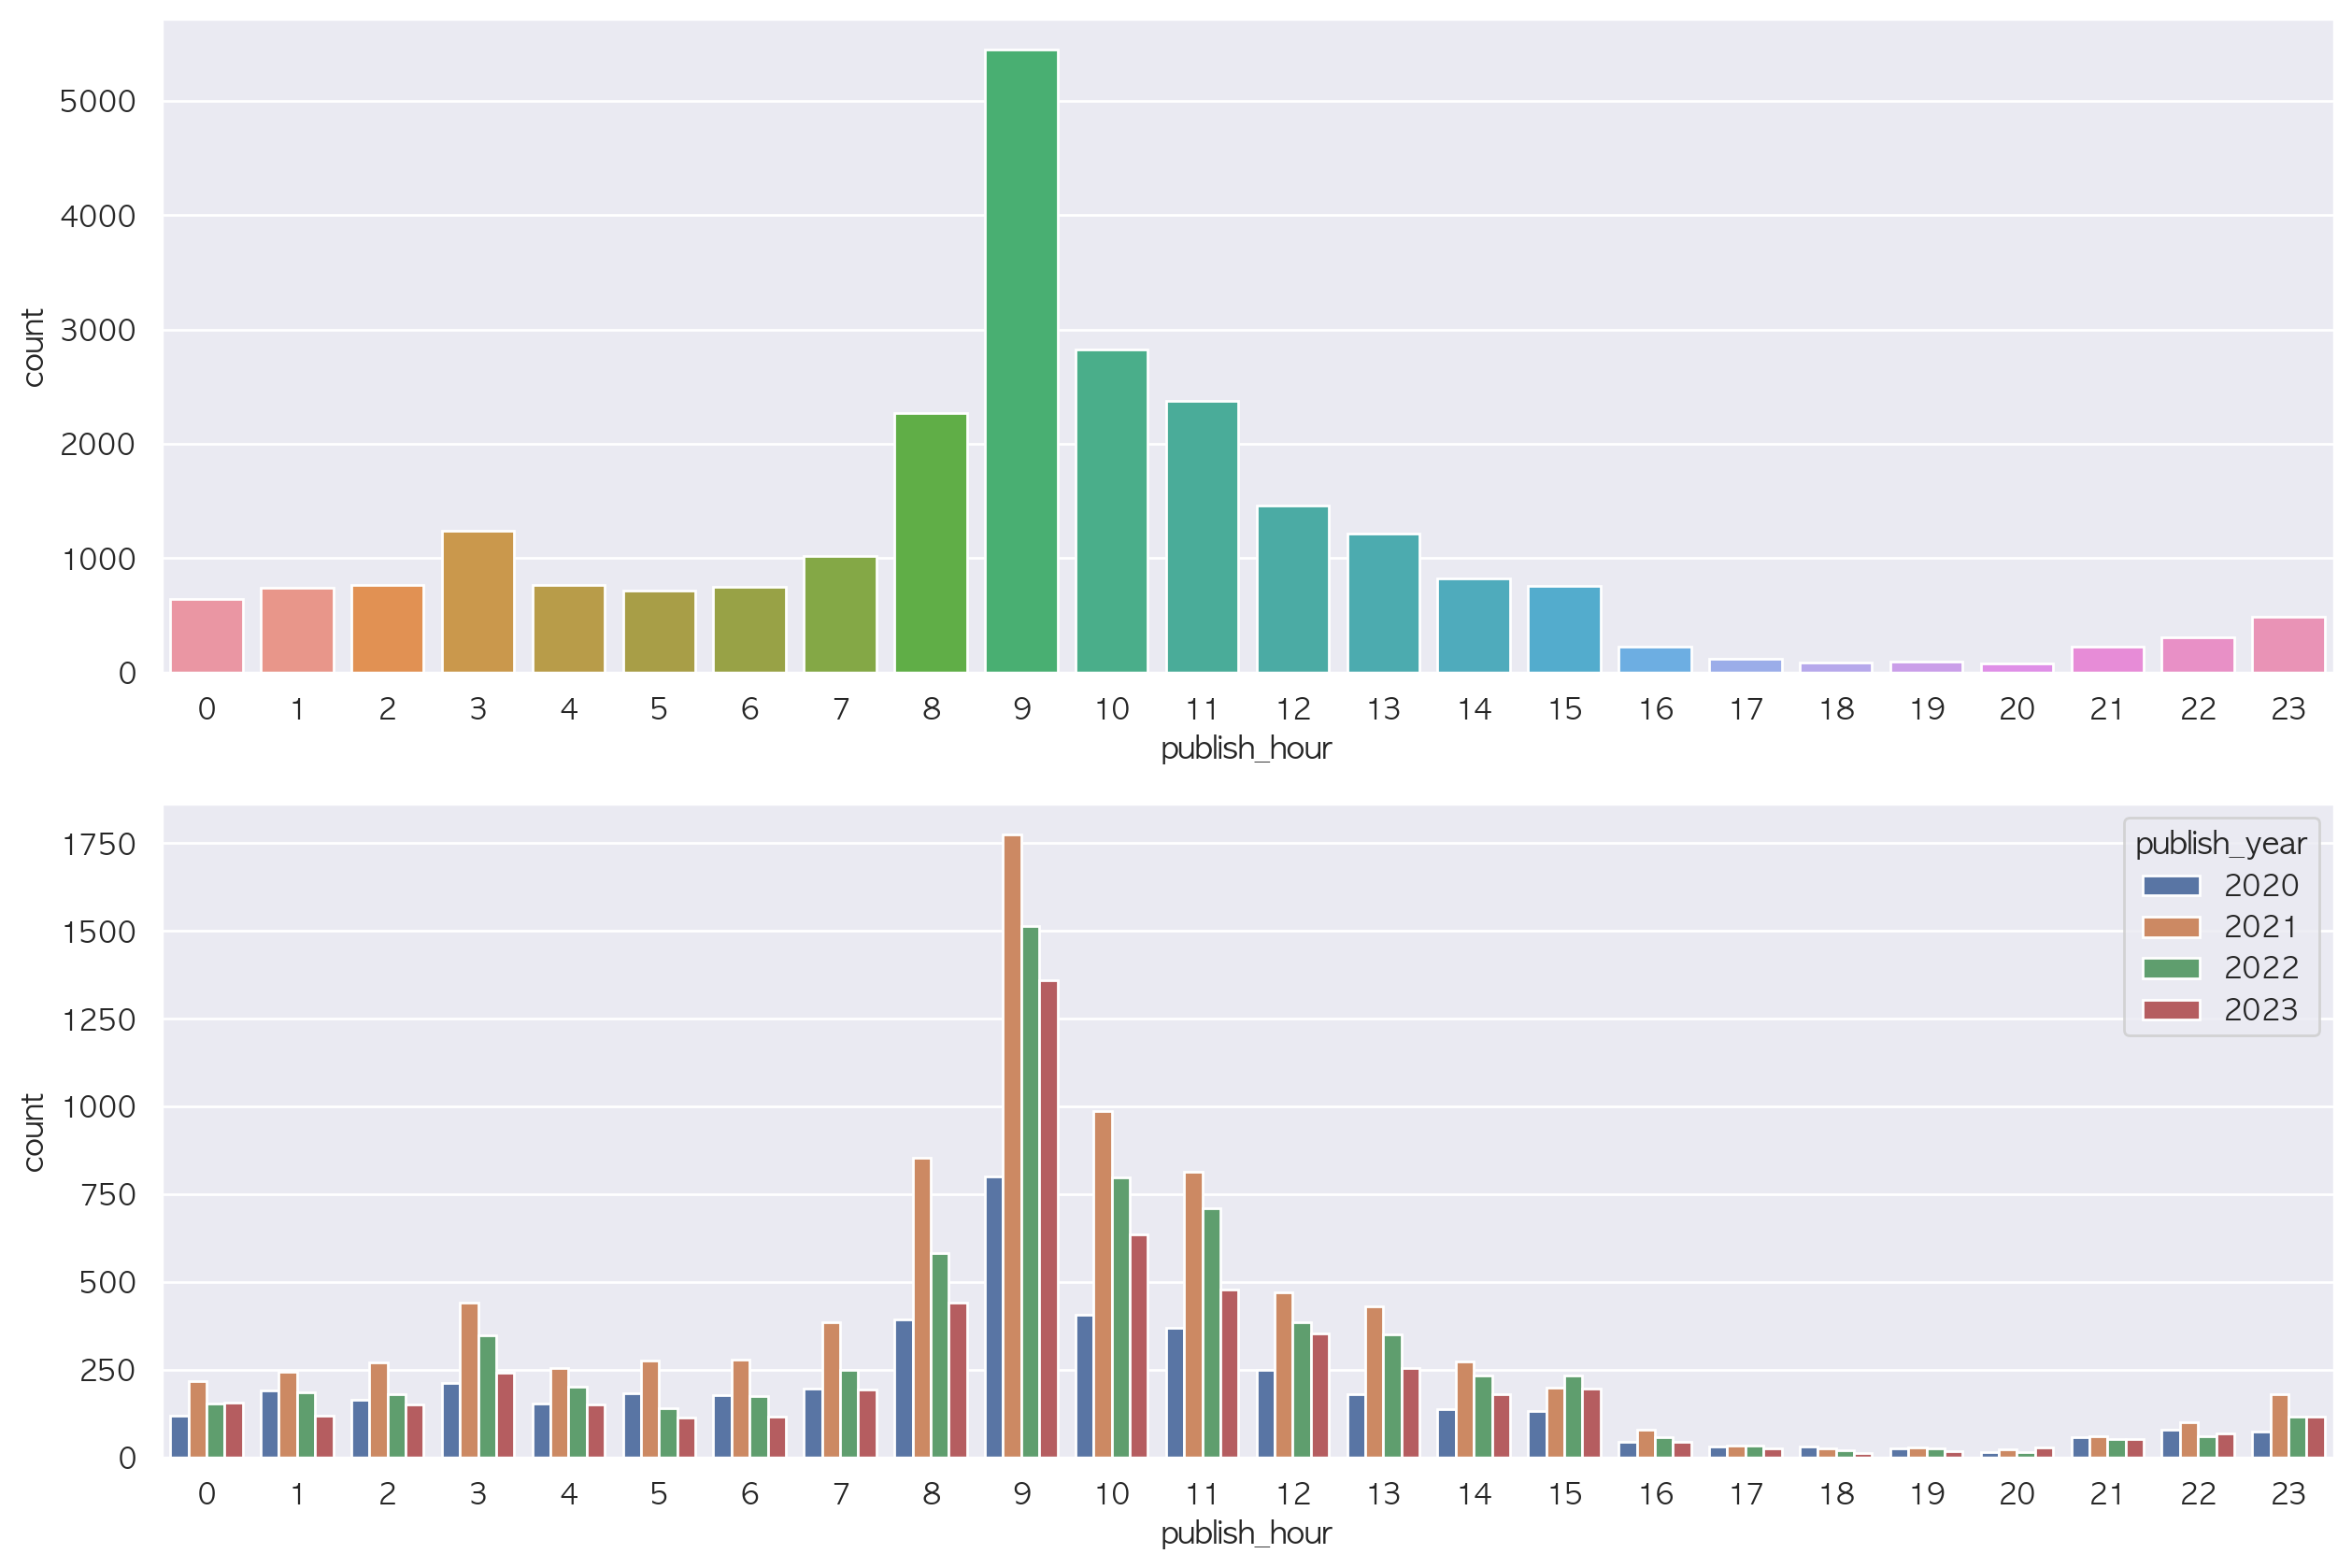

In [13]:
fig,ax = plt.subplots(nrows = 2 , ncols = 1 , figsize = (15,10))

sns.countplot(data =df_upload , x = 'publish_hour' , ax = ax[0])
sns.countplot(data =df_upload , x = 'publish_hour',hue = 'publish_year' , ax= ax[1])

**[ Q1. 결론 ]**  
- 압도적으로 9시에 업로드한 영상이 많다.  
- 주로 8시~11시 오전 시간대에 업로드 한다

Q2. 요일별 조회수는 어떠한가? 차이가 있을까? 

In [14]:
df_upload= df_upload.sort_values(by = 'publish_daysofweek')

In [15]:
day = {
    0 : '월',
    1: '화',
    2 : '수',
    3 : '목',
    4 : '금',
    5 : '토',
    6: '일'
}
df_upload['publish_day'] = df_upload['publish_daysofweek'].map(day)

In [16]:
df_upload['publish_day'] .value_counts()

publish_day
금    4075
목    3961
수    3739
화    3719
월    3463
토    3311
일    3148
Name: count, dtype: int64

<Axes: xlabel='publish_daysofweek', ylabel='count'>

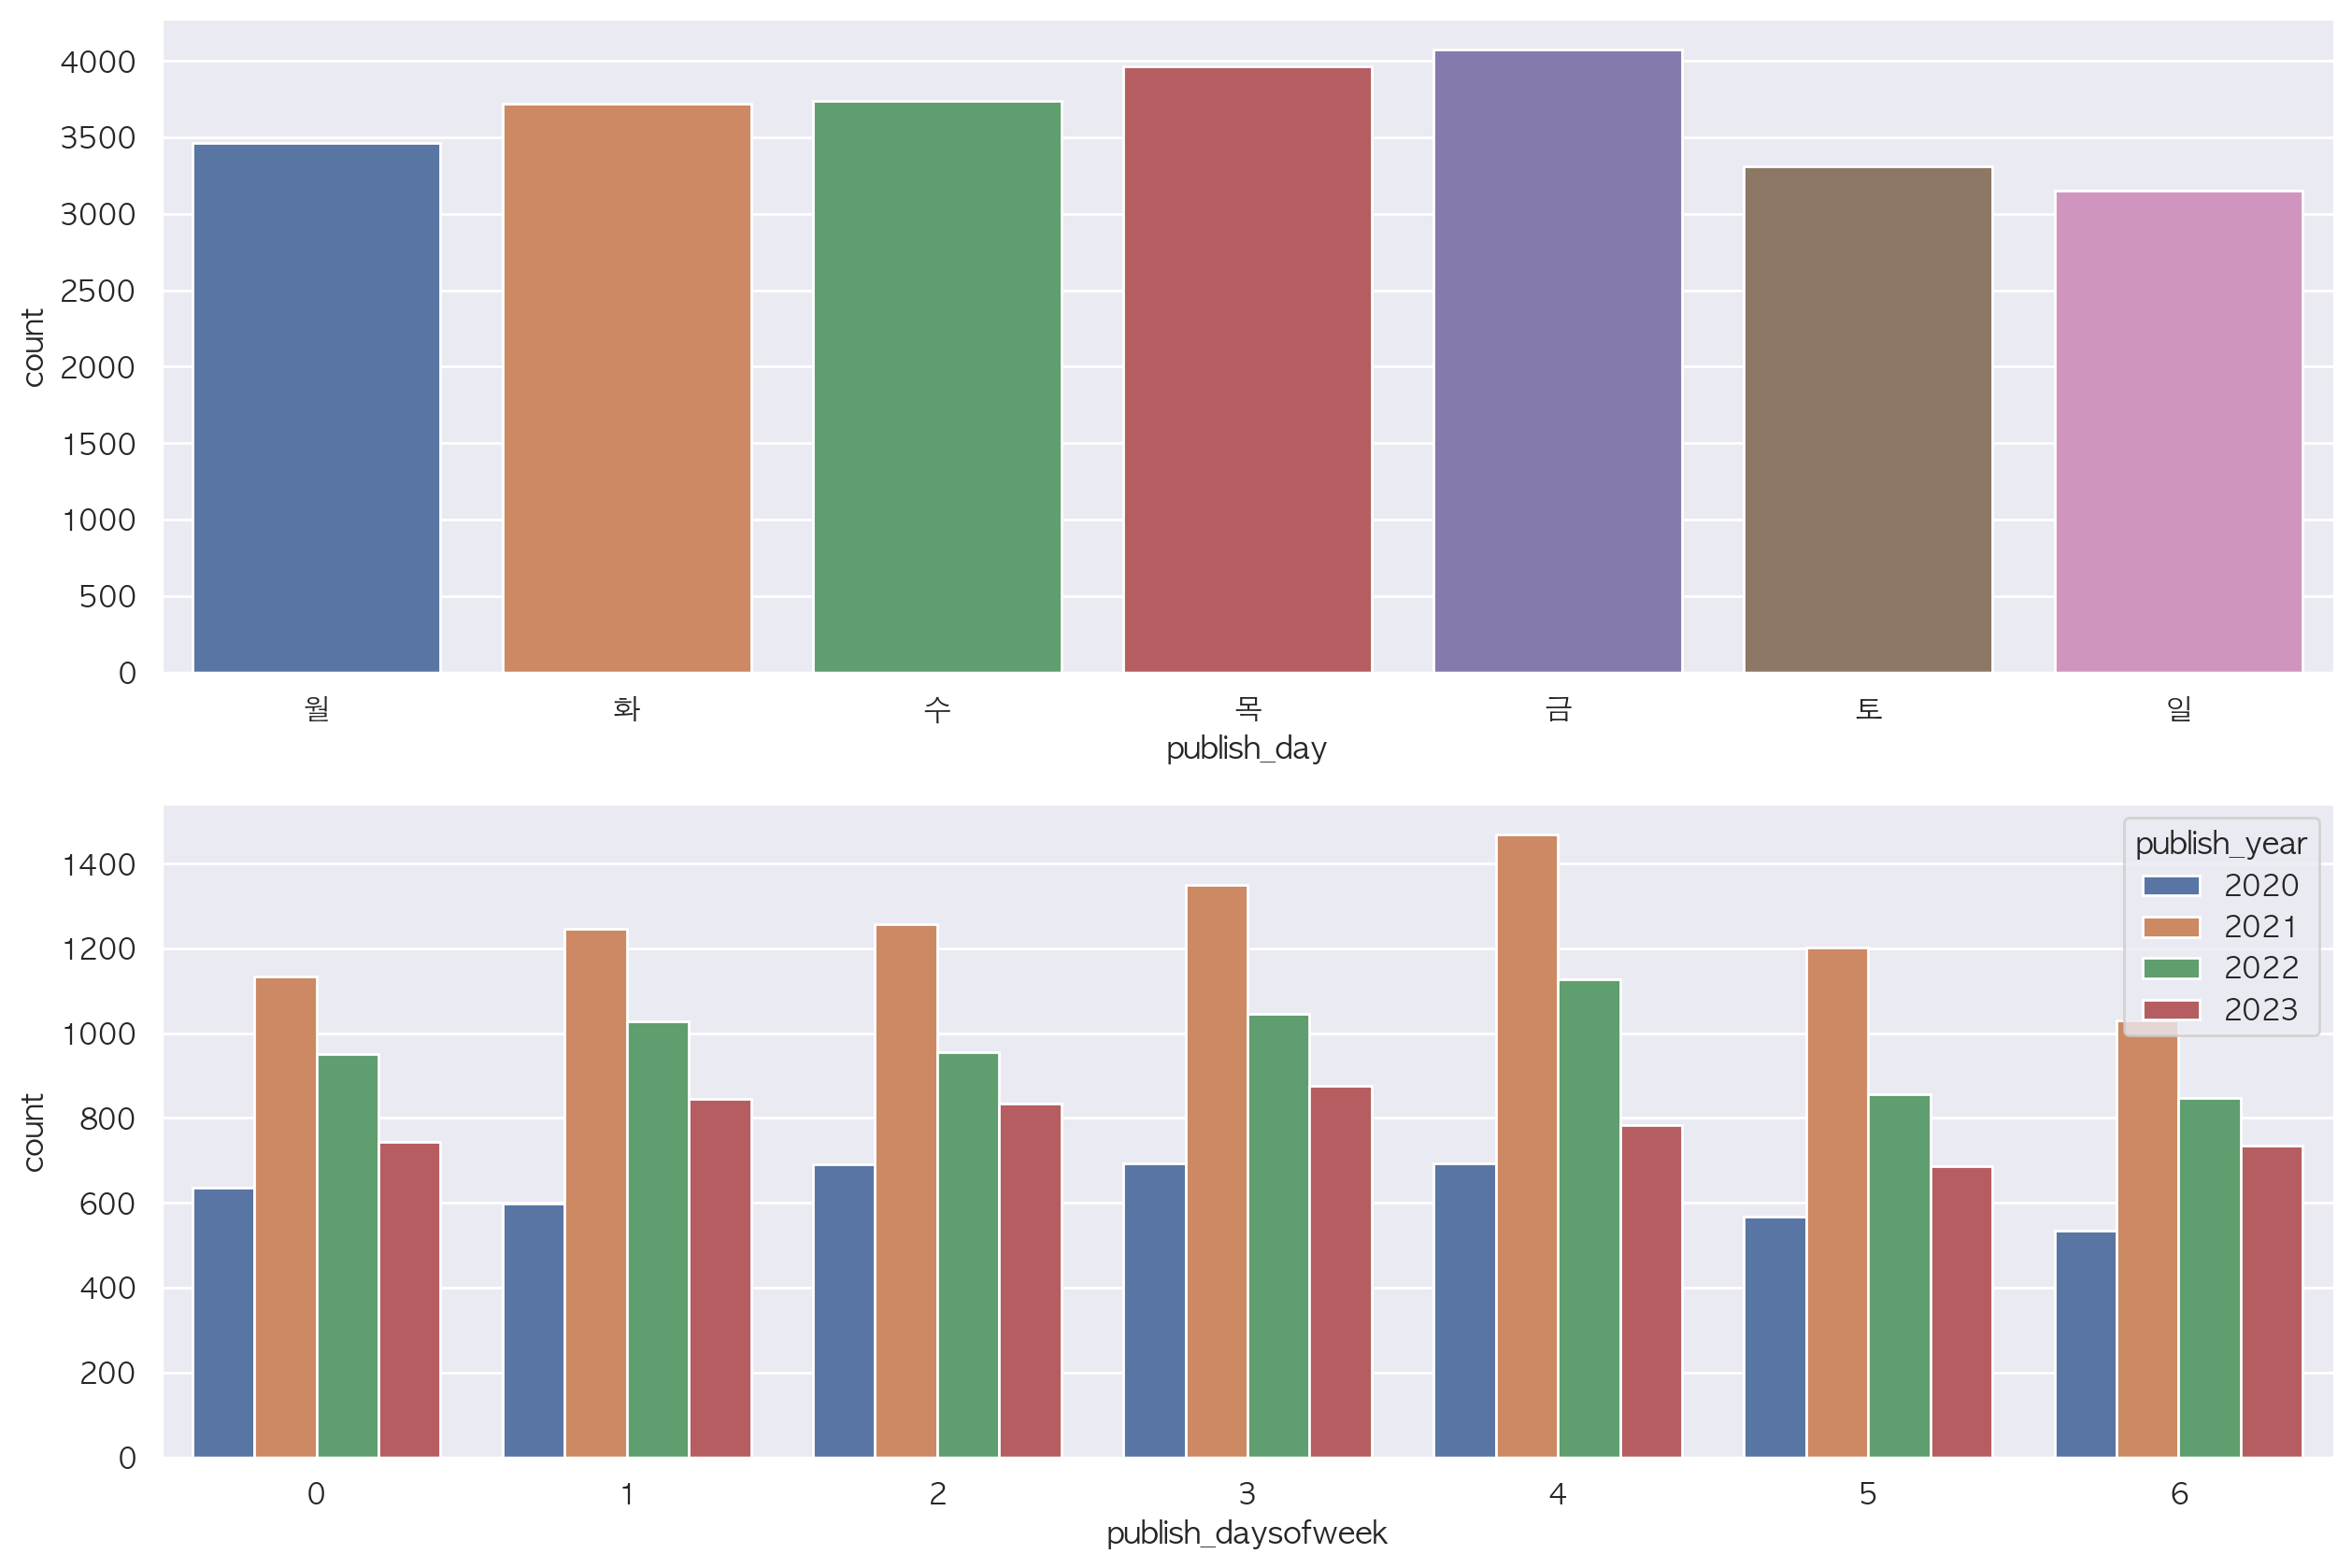

In [17]:
#월 ~ 일요일
fig,ax = plt.subplots(nrows = 2 , ncols = 1 , figsize = (15,10))

sns.countplot(data =df_upload , x = 'publish_day' , ax = ax[0])
sns.countplot(data =df_upload , x = 'publish_daysofweek',hue = 'publish_year' , ax= ax[1])

In [18]:
day_order = ['월' ,'화','수','목','금','토','일']
df_upload_crosstab = pd.crosstab(df_upload['publish_day'] , df_upload['publish_hour']).reindex(day_order)
df_upload_crosstab

publish_hour   0    1    2    3    4    5    6    7    8     9   ...   14  \
publish_day                                                      ...        
월              86  109  102  168   84   95   94  147  355   826  ...   90   
화              92   91   85  131   70   86   94  141  364   878  ...  101   
수              65   95  123  148  104  110   91  164  342   924  ...   86   
목              85   88   89  114   79   88   85  156  422   972  ...   71   
금              82   85   93  147  155  110  113  121  406  1046  ...  193   
토             129  165  155  324  127   89  154  107  197   373  ...  150   
일             105  104  115  210  143  134  114  185  184   431  ...  134   

publish_hour   15  16  17  18  19  20  21  22  23  
publish_day                                        
월              88  18  11   4   9   7  16  31  61  
화             148  28  14  14  14   8  22  27  64  
수             107  22  12  10  15  13  22  39  81  
목             136  35  14  11   8  10  22  41  81  
금              84  54  31  12   6   7  21  46  59  
토              87  38  20  22  20  20  58  51  64  
일             110  31  19  15  22  16  60  73  74  

[7 rows x 24 columns]

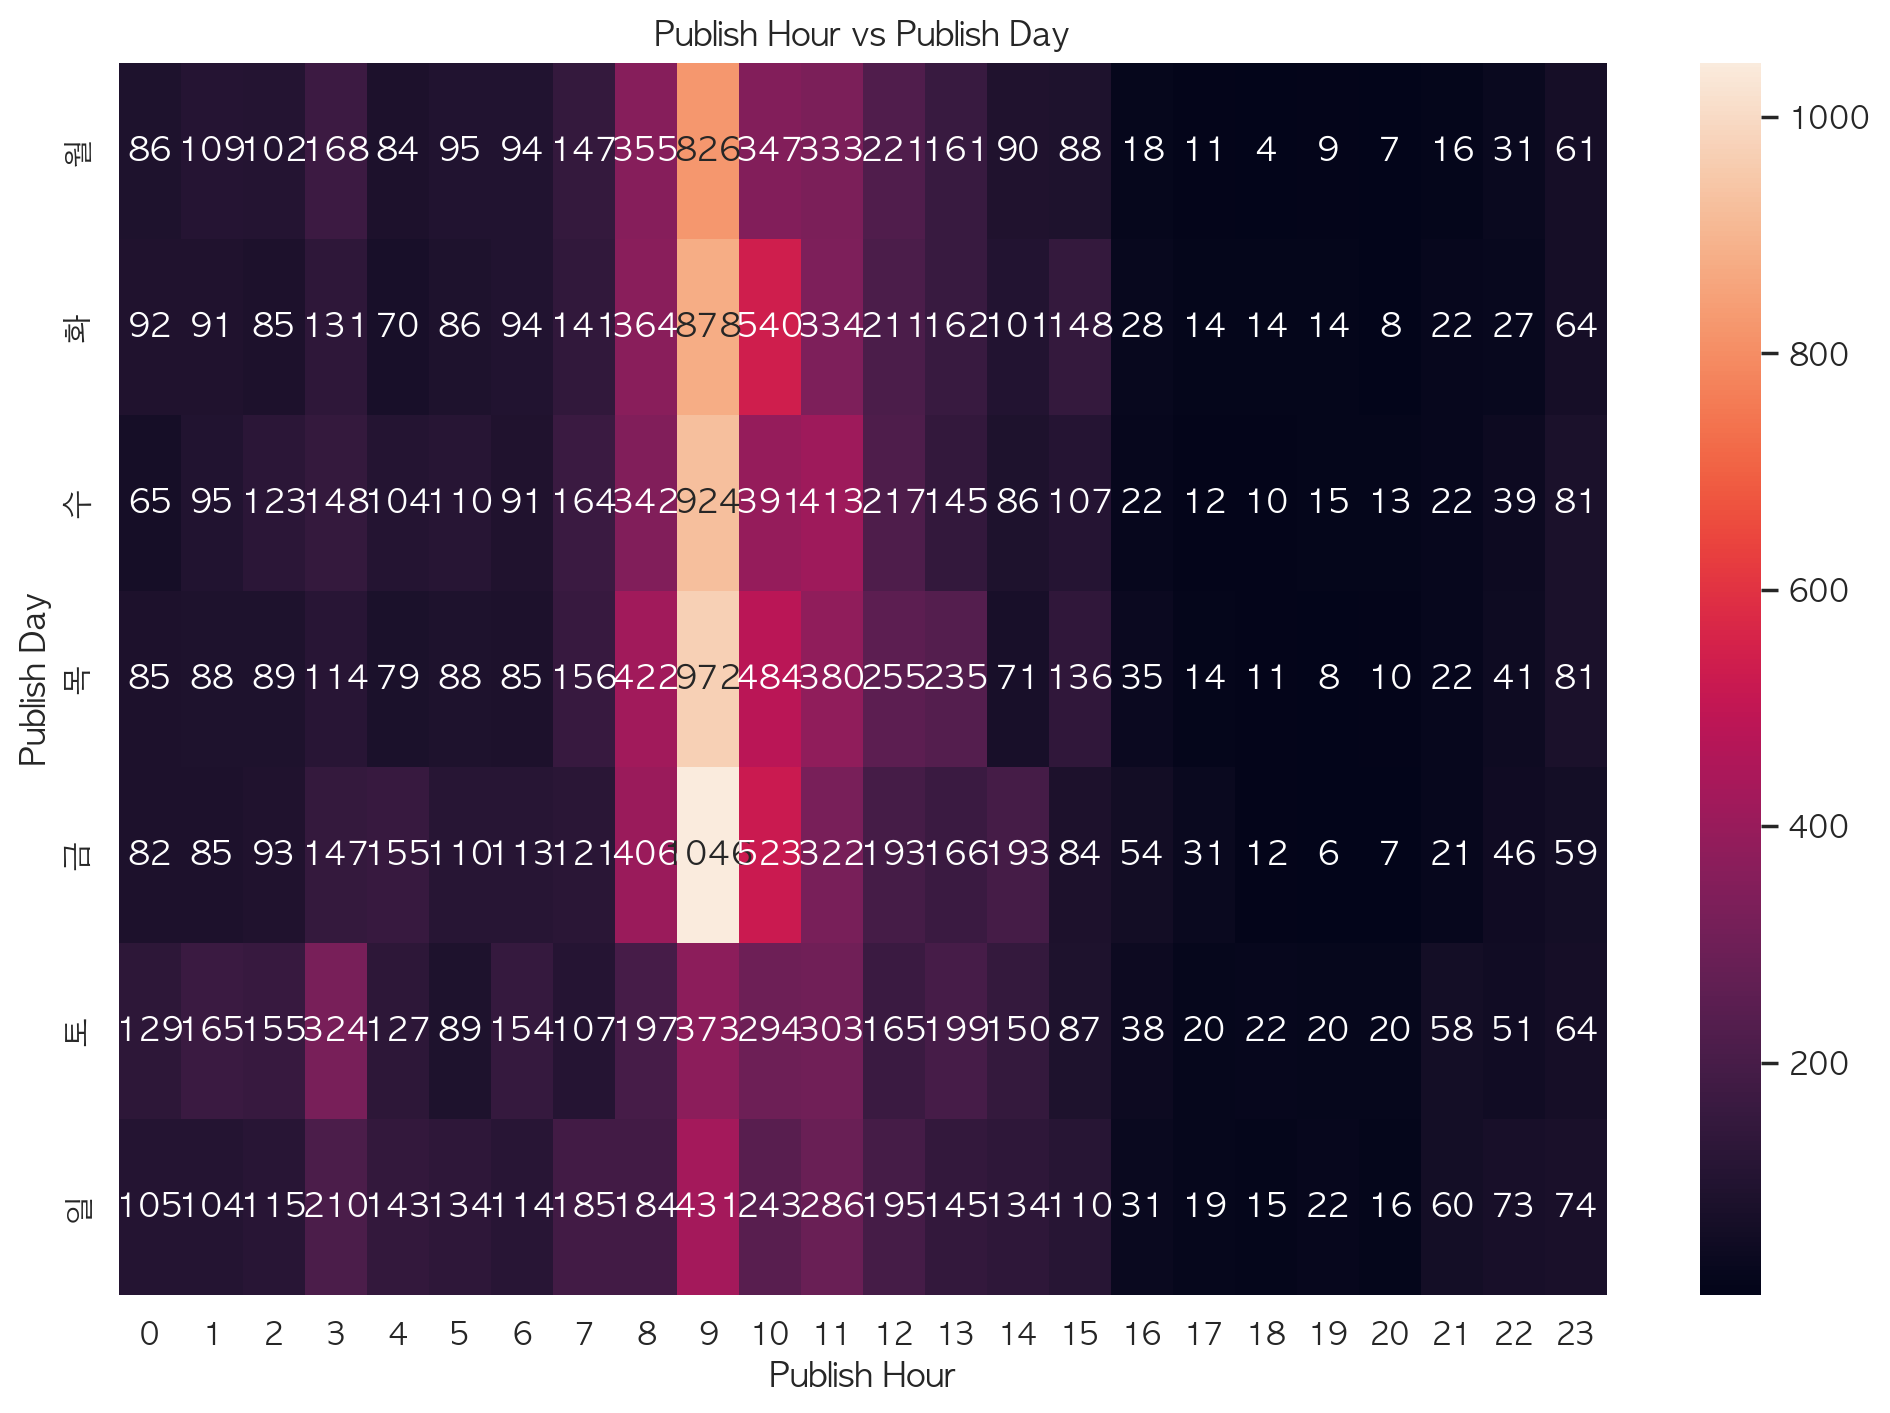

In [19]:
day_order = ['월' ,'화','수','목','금','토','일']
df_upload_crosstab = pd.crosstab(df_upload['publish_day'] , df_upload['publish_hour']).reindex(day_order)

plt.figure(figsize=(12, 8))
sns.heatmap(df_upload_crosstab, annot=True, fmt='d')
plt.title('Publish Hour vs Publish Day')
plt.xlabel('Publish Hour')
plt.ylabel('Publish Day')
plt.show()

**[ Q2. 결론 ]**  
요일별 업로드 수는 큰 차이가 없다.  
주말보다는 평일에 업로드한다.

Q3. 시간,요일에 따라 평균 조회수에 차이가 있을까?


In [20]:
#시간,요일대별로 평균 조회수 살펴보기

df_upload_pivot = df_upload.pivot_table(index='publish_day', columns='publish_hour', values='view_count', aggfunc='mean').reindex(day_order)
df_upload_pivot

publish_hour             0              1              2             3   \
publish_day                                                               
월             481388.581395  629065.256881  693262.088235  7.651951e+05   
화             377595.097826  391189.780220  485462.788235  5.481560e+05   
수             627910.215385  361747.757895  635740.390244  5.876533e+05   
목             504095.729412  378424.409091  430693.460674  7.038867e+05   
금             707433.707317  487115.941176  474982.698925  3.033203e+06   
토             531152.984496  571014.260606  535794.903226  4.681063e+05   
일             392112.047619  464286.298077  479008.330435  5.493931e+05   

publish_hour            4             5             6              7   \
publish_day                                                             
월             6.291946e+05  7.359484e+05  4.815082e+05  479673.299320   
화             8.707300e+05  6.395722e+05  4.554880e+05  536527.163121   
수             1.138052e+06  6.239916e+05  6.111276e+05  689317.286585   
목             7.363065e+05  6.490872e+05  4.703940e+05  694305.064103   
금             6.191416e+06  2.530923e+06  6.774610e+05  564347.661157   
토             7.888086e+05  4.221403e+05  1.023995e+06  502665.887850   
일             4.857525e+05  4.830751e+05  5.134929e+05  540997.010811   

publish_hour            8             9   ...             14            15  \
publish_day                               ...                                
월             1.239958e+06  1.718713e+06  ...  954179.344444  1.791893e+06   
화             5.196887e+05  1.011697e+06  ...  929286.861386  2.047321e+06   
수             5.624710e+05  6.892439e+05  ...  933490.848837  1.515344e+06   
목             6.359273e+05  6.933545e+05  ...  911662.661972  1.601983e+06   
금             5.492135e+05  9.306904e+05  ...  946101.533679  8.926239e+05   
토             5.372973e+05  4.838606e+05  ...  790566.606667  2.064208e+06   
일             5.397994e+05  5.747529e+05  ...  794046.925373  1.680681e+06   

publish_hour            16            17            18            19  \
publish_day                                                            
월             1.118661e+06  7.834148e+05  6.552742e+05  3.792665e+06   
화             1.005195e+06  1.382764e+06  6.374998e+06  2.391723e+06   
수             9.396050e+05  3.288227e+05  2.560870e+06  8.879558e+05   
목             5.461259e+05  3.429106e+06  2.898989e+05  1.822378e+06   
금             1.029965e+06  1.026473e+06  1.350920e+06  3.607620e+05   
토             1.212485e+07  7.333398e+05  1.041112e+06  2.444669e+06   
일             1.282003e+06  1.742164e+06  1.381586e+06  9.444951e+05   

publish_hour            20            21            22             23  
publish_day                                                            
월             4.941011e+05  5.417702e+05  5.490618e+05  330979.967213  
화             1.546033e+06  1.125721e+06  6.907248e+05  417870.359375  
수             9.071595e+05  4.443664e+05  5.341347e+05  518536.160494  
목             8.518161e+05  1.323127e+06  5.644441e+05  674089.061728  
금             1.491205e+06  5.298621e+05  6.364446e+05  611537.457627  
토             4.619206e+06  3.079434e+06  1.370978e+06  580204.312500  
일             6.847484e+05  1.002188e+06  6.793828e+05  790151.878378  

[7 rows x 24 columns]

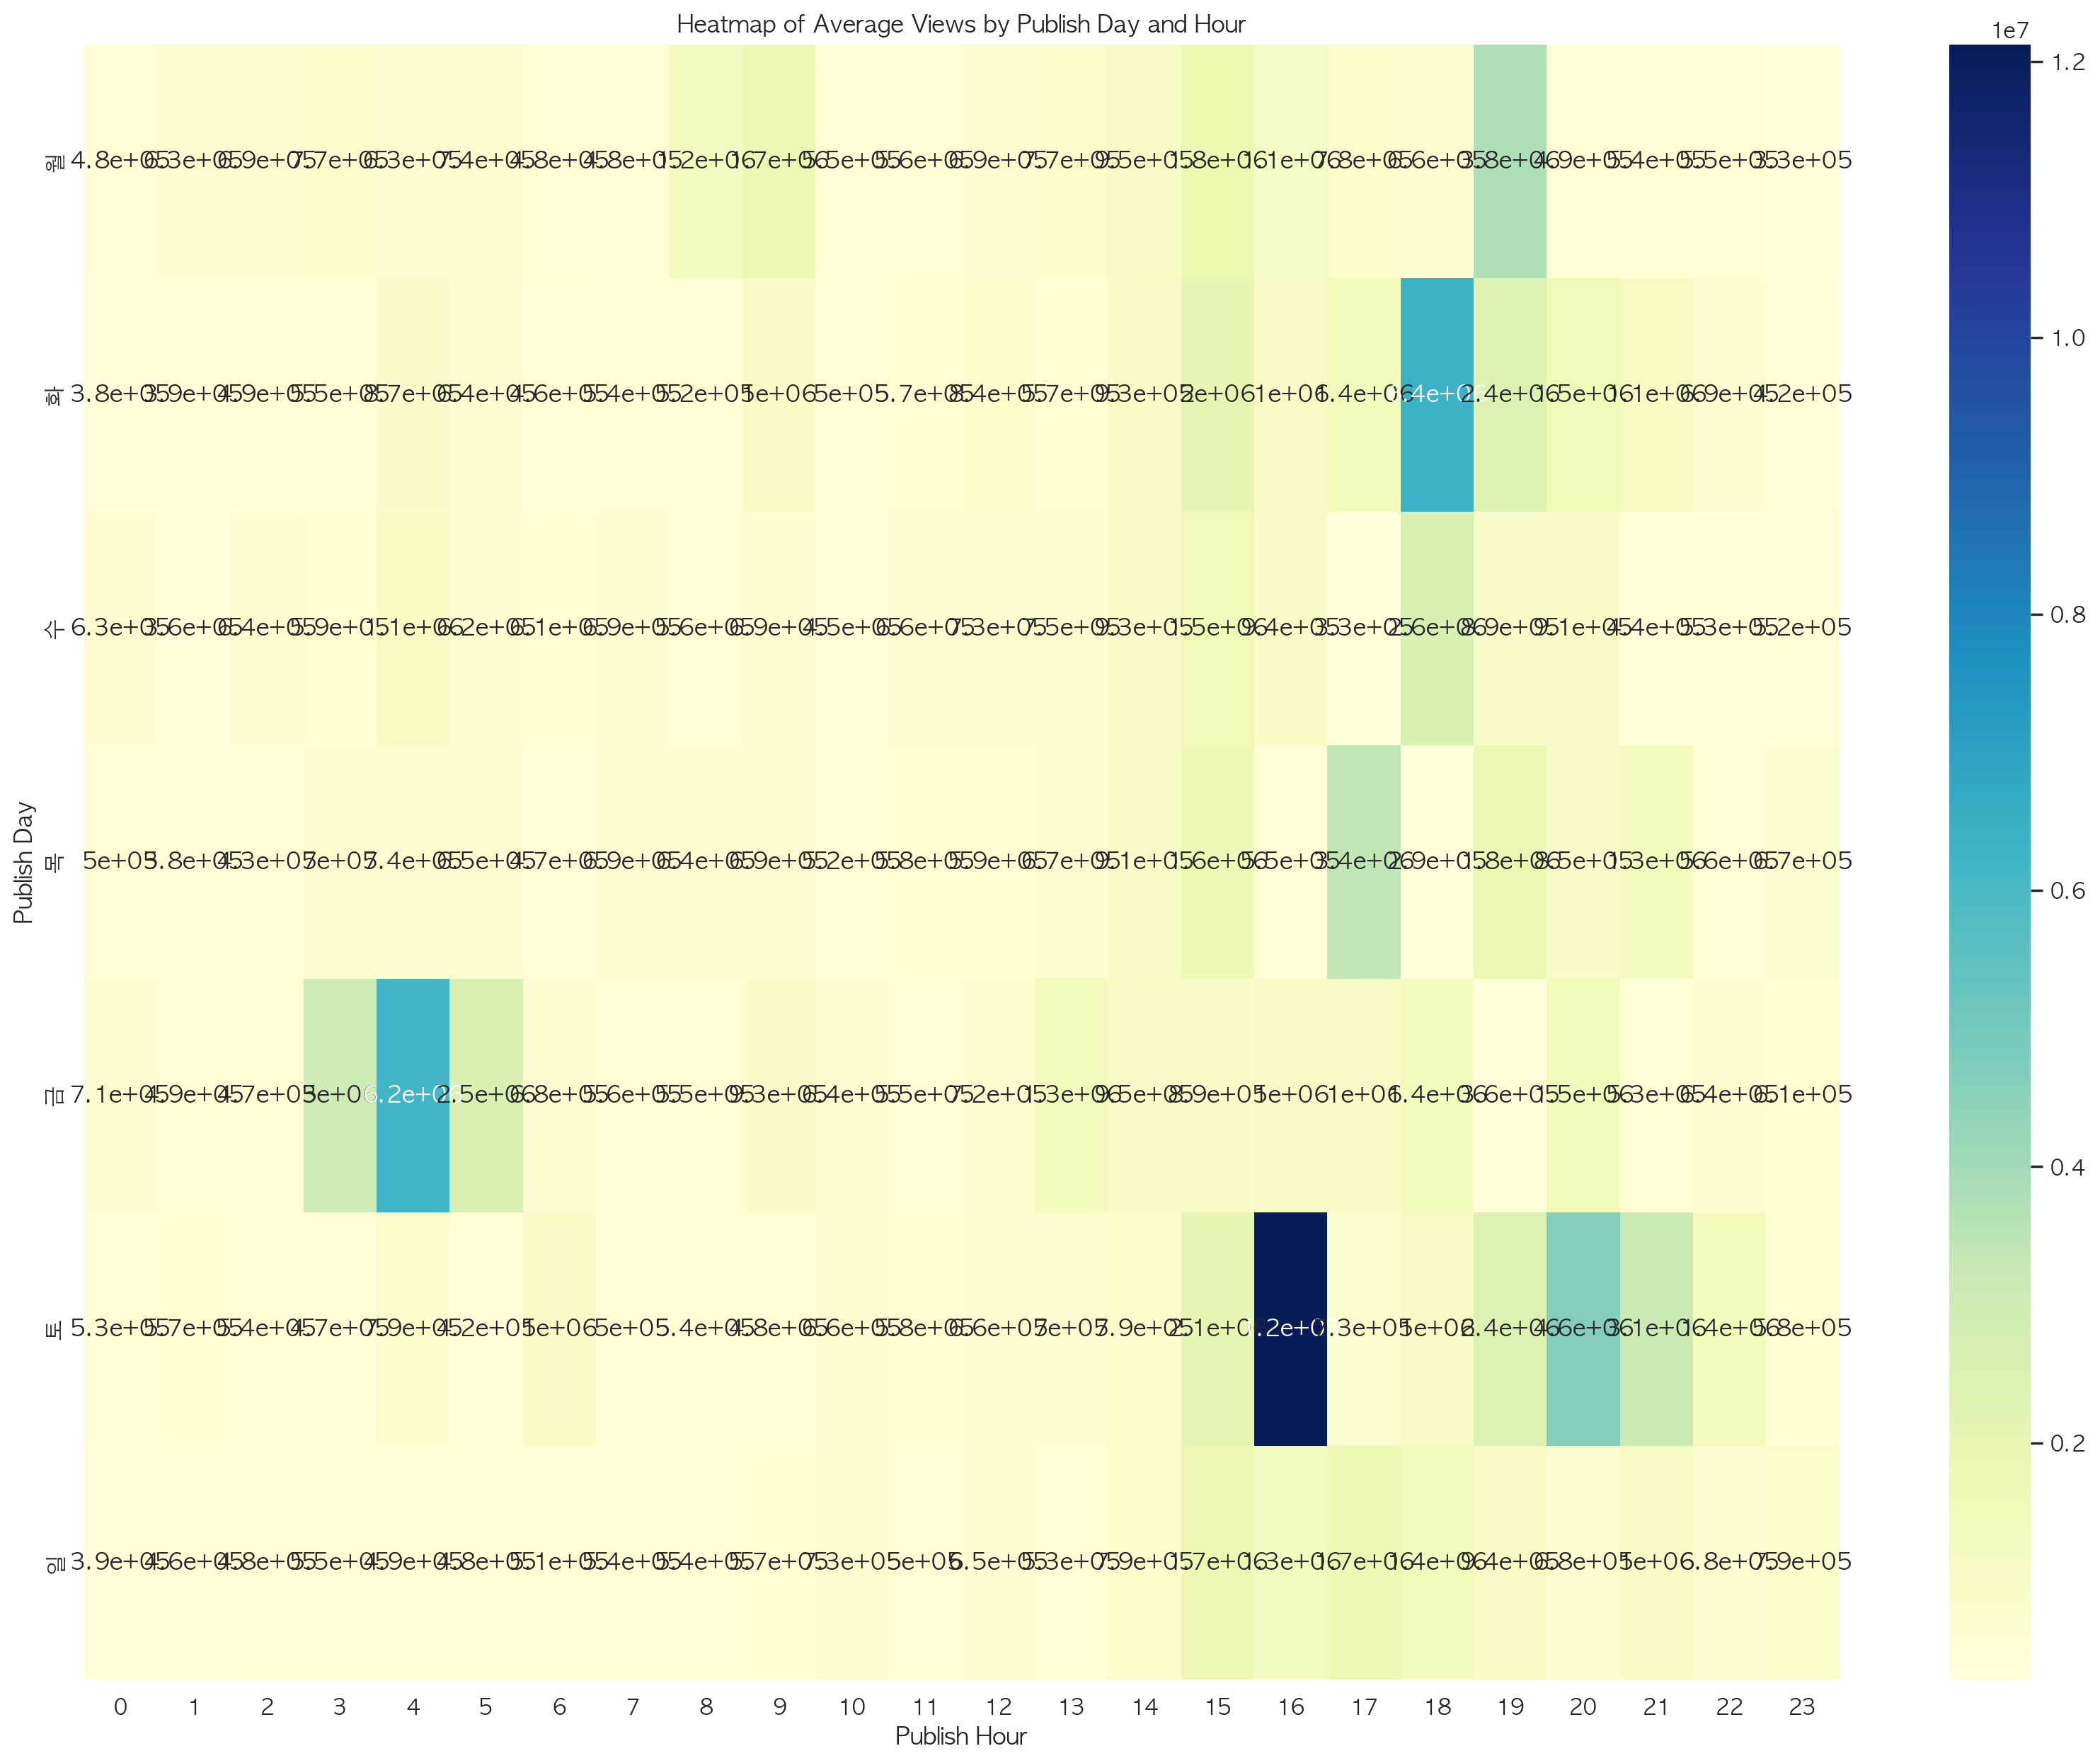

In [21]:
#시각화하기
plt.figure(figsize=(20, 15))
sns.heatmap(df_upload_pivot, cmap='YlGnBu', annot=True)
plt.title('Heatmap of Average Views by Publish Day and Hour')
plt.xlabel('Publish Hour')
plt.ylabel('Publish Day')
plt.show()

In [22]:
#토요일 16시에 게시한 영상 카테고리 살펴보기
df_upload_16 = df_upload.loc[(df_upload['publish_hour'] == 16) & (df_upload['publish_day'] == "토")].sort_values(by = 'view_count' , ascending = False)
df_upload_16['categoryId'].value_counts() / df_upload_16['categoryId'].value_counts().sum()

categoryId
24    0.315789
17    0.289474
10    0.157895
20    0.131579
22    0.052632
25    0.026316
15    0.026316
Name: count, dtype: float64

In [23]:
#화요일 18시에 게시한 영상 카테고리 살펴보기
df_upload_18 = df_upload.loc[(df_upload['publish_hour'] == 18) & (df_upload['publish_day'] == "화")]
df_upload_18['categoryId'].value_counts() / df_upload_18['categoryId'].value_counts().sum()

categoryId
28    0.714286
17    0.214286
1     0.071429
Name: count, dtype: float64

### 2. 유튜브 급상승 동영상 업로드 시차 분석
 

Q4. 인급동에 올라가는 데 걸리는 시간은?  

+ 업로드와 트렌딩 등록 시차  
   + diff = trending_date - publishedAt  
     .
+ 일단위로만 확인 diff_day  
   + 다음날 0 / 당일 -1 

In [24]:
df_youtube = df_youtube_trending.copy()
# date time으로 변경
df_youtube["trending_date"] = pd.to_datetime(df_youtube["trending_date"], utc=False)
df_youtube["publishedAt"] = pd.to_datetime(df_youtube["publishedAt"], utc = False)

# 인급동 게시 시간과 업로드 시간의 차이 계산 diff

df_youtube["diff"] = df_youtube["trending_date"] - df_youtube["publishedAt"]

# diff에서 날짜
df_youtube["diff_day"] = df_youtube["diff"].dt.components.days

# 업로드한 시간 확인
df_youtube["pop_time"] = df_youtube["publishedAt"].dt.hour

In [25]:
# 카테고리 리스트(적은순)
cat_list = df_youtube["category"].value_counts().sort_values().index

In [26]:
# 처음 등장한 시점만(중복 제거)
df_pop = df_youtube.drop_duplicates("title", keep = 'first')
df_pop

video_id                                              title  \
0       uq5LClQN3cE                                        안녕하세요 보겸입니다   
1       I-ZbZCHsHD0                                 부락토스의 계획 [총몇명 프리퀄]   
2       9d7jNUjBoss                                    평생 반성하면서 살겠습니다.   
3       3pI_L3-sMVg                               안녕하세요 꽈뚜룹입니다.   
4       zrsBjYukE8s   박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V   
...             ...                                                ...   
231775  hI45Eji4BCU  Wolves 2 Newcastle United 2 | Premier League h...   
231776  xNVz6YAxNCc                                             전여친 흔적   
231777  cH_tMGWijFk  장민호 JANG MIN HO | '그때 우린 젊었다 (We Were Young)' ...   
231811  5MZ6TQqDmw8  [ENG SUB] 치열한(?) 메인 보컬 테스트🎤 (Feat. 사랑꾼❤, GD 모사...   
231866  Sgtgvdf3XcA                   [초식물남] EP#최종화. 요즘 남자가 연애 안 하는 이유   

                     publishedAt                 channelId       channelTitle  \
0      2020-08-09 09:32:48+00:00  UCu9BCtGIEr73LXZsKmoujKw              보겸 BK   
1      2020-08-12 09:00:08+00:00  UCRuSxVu4iqTK5kCh90ntAgA                총몇명   
2      2020-08-10 09:54:13+00:00  UCMVC92EOs9yDJG5JS-CMesQ        양팡 YangPang   
3      2020-08-11 15:00:58+00:00  UCkQCwnkQfgSuPTTnw_Y7v7w      꽈뚜룹 Quaddurup   
4      2020-08-11 09:00:13+00:00  UCaO6TYtlC8U5ttz62hTrZgg  JYP Entertainment   
...                          ...                       ...                ...   
231775 2023-10-28 21:00:30+00:00  UCywGl_BPp9QhD0uAcP2HsJw   Newcastle United   
231776 2023-10-28 10:00:53+00:00  UC2fRmj7qqiuD5VXtBO4hh2A          픽고 PICKGO   
231777 2023-10-28 09:00:32+00:00  UC00wMKeoF72UURd3WO9pZHw                장민호   
231811 2023-10-21 12:14:52+00:00  UCx6jsZ02B4K3SECUrkgPyzg            놀면 뭐하니?   
231866 2023-10-22 08:00:18+00:00  UCYn09ySlShmzBtYwl1OgOsA         CheezeFilm   

        categoryId             trending_date  \
0               24 2020-08-12 00:00:00+00:00   
1                1 2020-08-12 00:00:00+00:00   
2               22 2020-08-12 00:00:00+00:00   
3               24 2020-08-12 00:00:00+00:00   
4               10 2020-08-12 00:00:00+00:00   
...            ...                       ...   
231775          17 2023-10-29 00:00:00+00:00   
231776          24 2023-10-29 00:00:00+00:00   
231777          22 2023-10-29 00:00:00+00:00   
231811          24 2023-10-29 00:00:00+00:00   
231866          24 2023-10-29 00:00:00+00:00   

                                                     tags  view_count   likes  \
0                                               보겸|bokyem     5947503   53326   
1                     총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리      963384   28244   
2       양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...     2950885   17974   
3       꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...     1743374   36893   
4       JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...     3433885  353337   
...                                                   ...         ...     ...   
231775      newcastle united|nufc|football|premier league      247629    2672   
231776                웹드라마|연애|공감|픽고|전여친|흔적|남자친구|인스타|카톡|염탐      325978    5190   
231777                                             [None]       38928    2823   
231811  놀면 뭐하니?|놀면뭐하니|유재석|유플래시|유산슬|뽕포유|유르페우스|무도|놀면 뭐하니...      997968    9432   
231866  webdrama|drama|kdrama|highteen|school|romance|...      709709    9321   

        dislikes  comment_count  \
0         105756         139946   
1            494           3339   
2          68898          50688   
3           1798           8751   
4           9763          23405   
...          ...            ...   
231775         0            155   
231776         0            468   
231777         0            389   
231811         0           1633   
231866         0            926   

                                        thumbnail_link  comments_disabled  \
0       https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg              False   
1       https://i.ytimg.com/vi/

In [27]:
# 사라지기 직전 데이터 모음
df_die = df_youtube.drop_duplicates("title", keep = 'last')
df_die

video_id                                              title  \
10      rFwZqtPc-Ss  [책이벤트] 진짜 인플루언서로 사는 법 | 황태환 @비글부부 Bgeul Bubu  ...   
14      JVqe_O7ifcI  [8/12] 김용관,기모란,정준희,김한규,김병민,박창진,김근태,김성희,윤성은,최광희...   
18      geZXCYNRvy4  [단독 풀버전] 이수현(Lee Suhyun) '주저하는 연인들을 위해' ｜ 💧눈물파...   
31      RidIxC20hO4                                  내가 짝사랑했던 모든 남자들에게   
36      a53R-8tt974        4대강 팩.트.체.크(세상 쉬운 정리) | 지오다노 창업주, 홍콩에서 생긴 일   
...             ...                                                ...   
231949  44m9SLupfGg         하마스의 이스라엘 기습 공격! 그들은 왜? | 이스라엘, 하마스, 팔레스타인   
231950  LpEzK_9QPeM  [꼬꼬무 97회 요약] ＂댐을 열면 서울은 끝납니다!＂ 강을 지킬 것인가, 댐을 지...   
231951  IndxQrR2pp4  선미 (SUNMI) _ STRANGER | 1theKILLPO | 원더킬포 | 킬포...   
231952  wNGjAMCea0Q                             한국행 비행기표를 슬비에게 선물했더니..   
231953  CKsuPRFpC2s  [뮤뱅 원테이크 4K] 아이브(IVE) 'Baddie' 4K Bonus Ver. @...   

                     publishedAt                 channelId  \
10     2020-08-10 09:00:12+00:00  UCgheNMc3gGHLsT-RISdCzDQ   
14     2020-08-12 01:54:26+00:00  UC5HSw5OY2vfVFSihpiB-AVQ   
18     2020-08-11 07:21:47+00:00  UC8WoHUeN-eLynnLKGkwajYQ   
31     2020-08-11 11:01:11+00:00  UC48NSSfUBsmL0k0wKxSqRkw   
36     2020-08-12 01:25:38+00:00  UC4Aa3OPkMenwTANpf0oWVRQ   
...                          ...                       ...   
231949 2023-10-12 13:54:07+00:00  UCXql5C57vS4ogUt6CPEWWHA   
231950 2023-10-13 14:30:05+00:00  UCPx-7AKiN1Z_qEVKhLQ5pAw   
231951 2023-10-18 10:59:36+00:00  UCqq-ovGE01ErlXakPihhKDA   
231952 2023-10-14 03:00:33+00:00  UCZrdvFEyELqLOAiTWhhH4Lg   
231953 2023-10-13 10:00:16+00:00  UCeLPm9yH_a_QH8n6445G-Ow   

                       channelTitle  categoryId             trending_date  \
10               세바시 강연 Sebasi Talk          27 2020-08-12 00:00:00+00:00   
14                        TBS 시민의방송          25 2020-08-12 00:00:00+00:00   
18                 Beginagain 비긴어게인          24 2020-08-12 00:00:00+00:00   
31                               릴카          22 2020-08-12 00:00:00+00:00   
36                     CBS 김현정의 뉴스쇼          25 2020-08-12 00:00:00+00:00   
...                             ...         ...                       ...   
231949                  김지윤의 지식Play          25 2023-10-29 00:00:00+00:00   
231950                달리 [SBS DALI]          24 2023-10-29 00:00:00+00:00   
231951  1theK Originals - 원더케이 오리지널          24 2023-10-29 00:00:00+00:00   
231952                  유맥주 YOOBEER          19 2023-10-29 00:00:00+00:00   
231953                     KBS Kpop          10 2023-10-29 00:00:00+00:00   

                                                     tags  view_count  likes  \
10      세바시 명강의|세바시 강연|인기강연|강사|행복|특강|강의|클래스|비글부부|하준맘|하...     1352767  42073   
14              TBS|김어준|뉴스공장|대북전단|삐라|이재용|삼성|정경심|타투이스트|김여정      314981  22938   
18      소향|헨리|하림|적재|정승환|크러쉬|beginagainkorea|Sohyang|He...     1002565  31246   
31      릴카|llilka|Lilka|종합게임|종합게임방송|종합게임채널|게임채널|게임|gam...      540309   8396   
36                     김현정|뉴스쇼|댓꿀쇼|섬진강|4대강|지오다노|빈과일보|지미라이       51877   2900   
...                                                   ...         ...    ...   
231949  이스라엘|팔레스타인|하마스|이스라엘 팔레스타인|가자지구|가자 지구|헤즈볼라|알아크사...     2003785  47135   
231950  꼬꼬무|꼬리에꼬리를무는그날이야기|SBS교양|SBS달리|장도연|장현성|장성규|SBS|...      913738   6097   
231951  선미|선미 신곡|선미 솔로|선미 컴백|SUNMI|STRANGER|1theKILLPO...     2335420  16032   
231952  #여행유튜버|#세계여행유튜버|#해외여행유튜버|#세계여행|#해외여행|#배낭여행|#유맥...      428257  15441   
231953  KBS|KPOP|뮤직|KBSKPOP|K-POP|케이팝|kpop|KBSKpop|음악|...     2905671  53171   

        dislikes  comment_count  \
10           344           1622   
14           331            355   
18           222           1700   
31           235           1106   
36            87            116   
...          ...            ...   
231949         0           1843   
231950         0            499   
231951         0            378   
231952         0            832   
231953         0           1636   

                                        thumbnail_link  comments_disab

<Axes: xlabel='diff_day', ylabel='Count'>

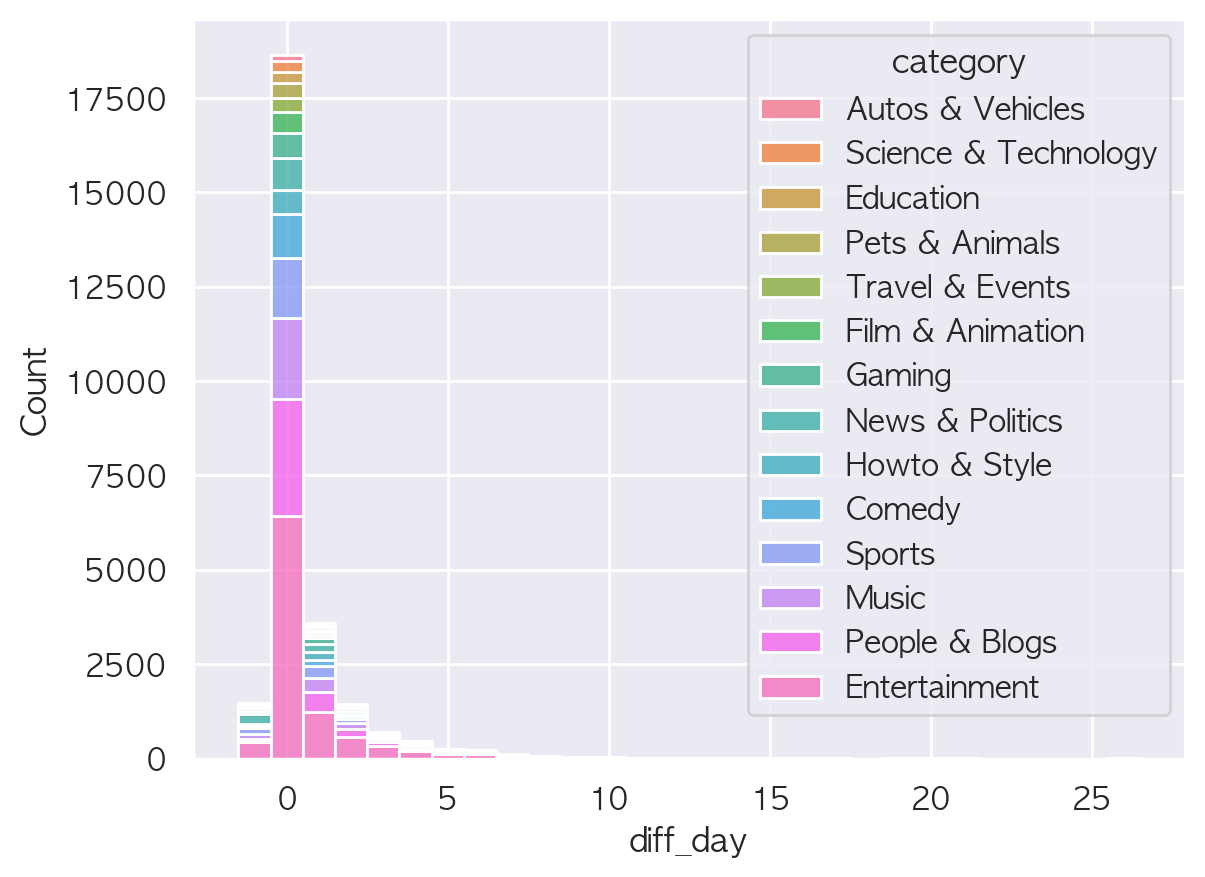

In [28]:
# 처음 올라온 날
sns.histplot(df_pop,
             x="diff_day",
             hue = "category",
             multiple="stack",
             hue_order = cat_list,
             discrete = True)

In [29]:
# 0(전일) 등록된 동영상이 올라갈 확률이 매우 높다.
# 당일 날 올라가는 경우는 매우 적다.
# 올린지 3일 이내에 트렌딩에 올라가지 못하면, 올라갈 가능성이 거의 없다.

<Axes: xlabel='diff_day', ylabel='Count'>

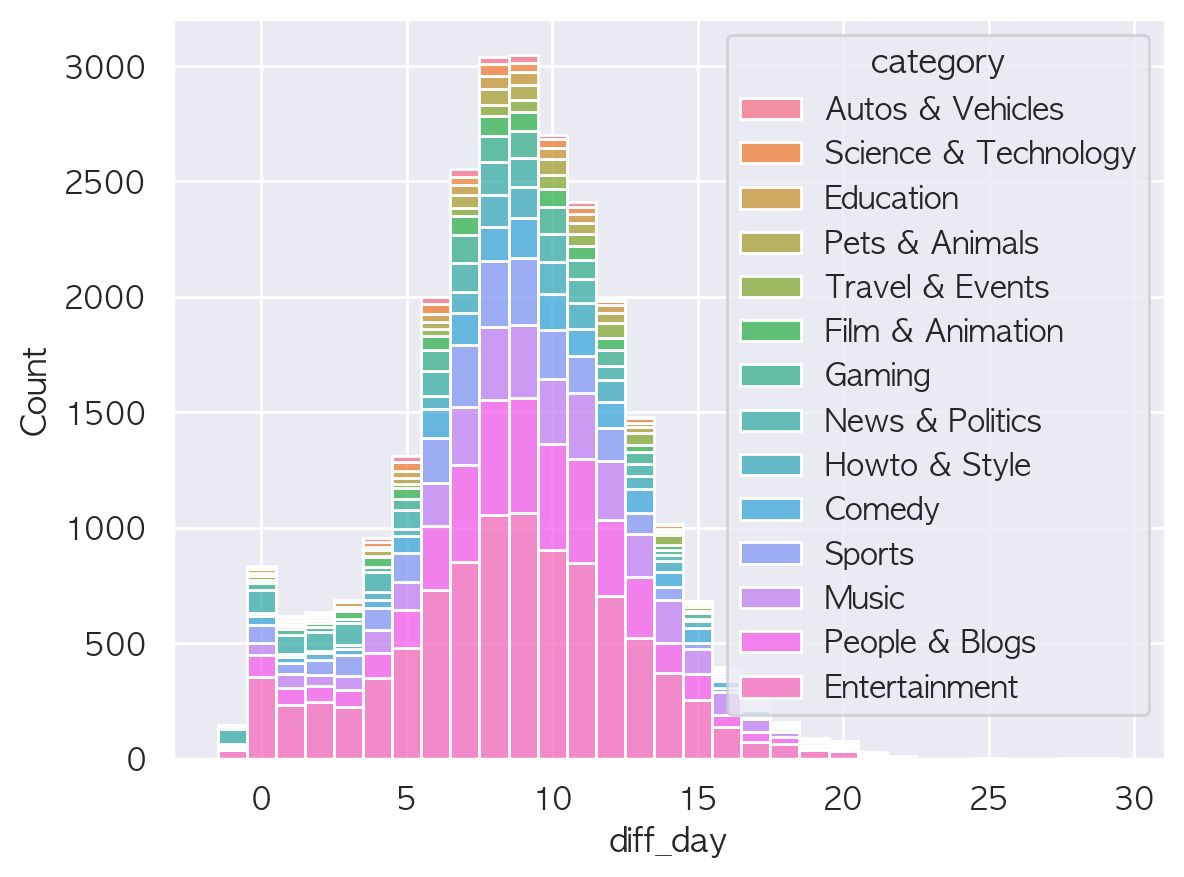

In [30]:
# 마지막 날
sns.histplot(df_die,
             x="diff_day",
             hue = "category",
             multiple="stack",
             hue_order = cat_list,
             discrete = True)

In [31]:
# 평균적으로 트렌딩은 9일정도 유지된다.

[ Q4. ]  
+ 유튜브 트렌딩은 전날 동영상이 올라가는 경우가 가장 많으며, 당일 날 올라가는 경우는 매우 적다.  
+ 올린지 3일 이내에 트렌딩에 올라가지 못하면, 올라갈 가능성이 거의 없다.  
+ 평균적으로 트렌딩은 9일정도 유지된다.

Q5. 급상승동영상의 조회수 상승 효과는 어떨까?

In [32]:
# 조회수 분석
title_list = df_youtube.sort_values("diff_day", ascending=False)["title"].unique()
long_title_list = title_list[0:10]
long_title_list

array(['Bad Habits', '大S徐熙媛&具俊曄 愛如初見｜202210 封面人物｜Vogue Taiwan',
       '돈이 움직이는 원리를 알면 돈이 보인다. 홍익희 작가 #TV특강 #스미다',
       '골프 | 대충치는 김국진! 왜 잘 칠까? | 드라이버 레슨 | 그래서경석',
       '경환을 시샘하고, 시기하고, 질투하고,,, 불타는 준호의 질투심🔥 [미운우리새끼|220925 SBS방송]',
       '[ENG SUB] 내 장점이 뭔지 알아~ 바로 골 때린 거야☺  [차린건 쥐뿔도 없지만] EP.12 #이영지 #크러쉬',
       '[노량: 죽음의 바다] 런칭 예고편',
       '아빠 드리려고 소방서에 김밥을 싸갔는데...김밥을 처음 먹어본 마케도니아 소방관들 반응?!',
       "20년 만에 예능으로 돌아온 강동원 자기님💘 '전우치', '의형제' 등 대작 비하인드 #highlight#유퀴즈온더블럭 | YOU QUIZ ON THE BLOCK EP.211",
       '(SUB) [전지적 할부지 시점] ep.139 “푸바오 언니한테 눈 가리기 배웠어오” 날이 갈수록 뚠뚠해지는 쌍둥이들과 육아만렙 아이바오🐼│Panda World'],
      dtype=object)

<Axes: xlabel='diff_day', ylabel='view_count'>

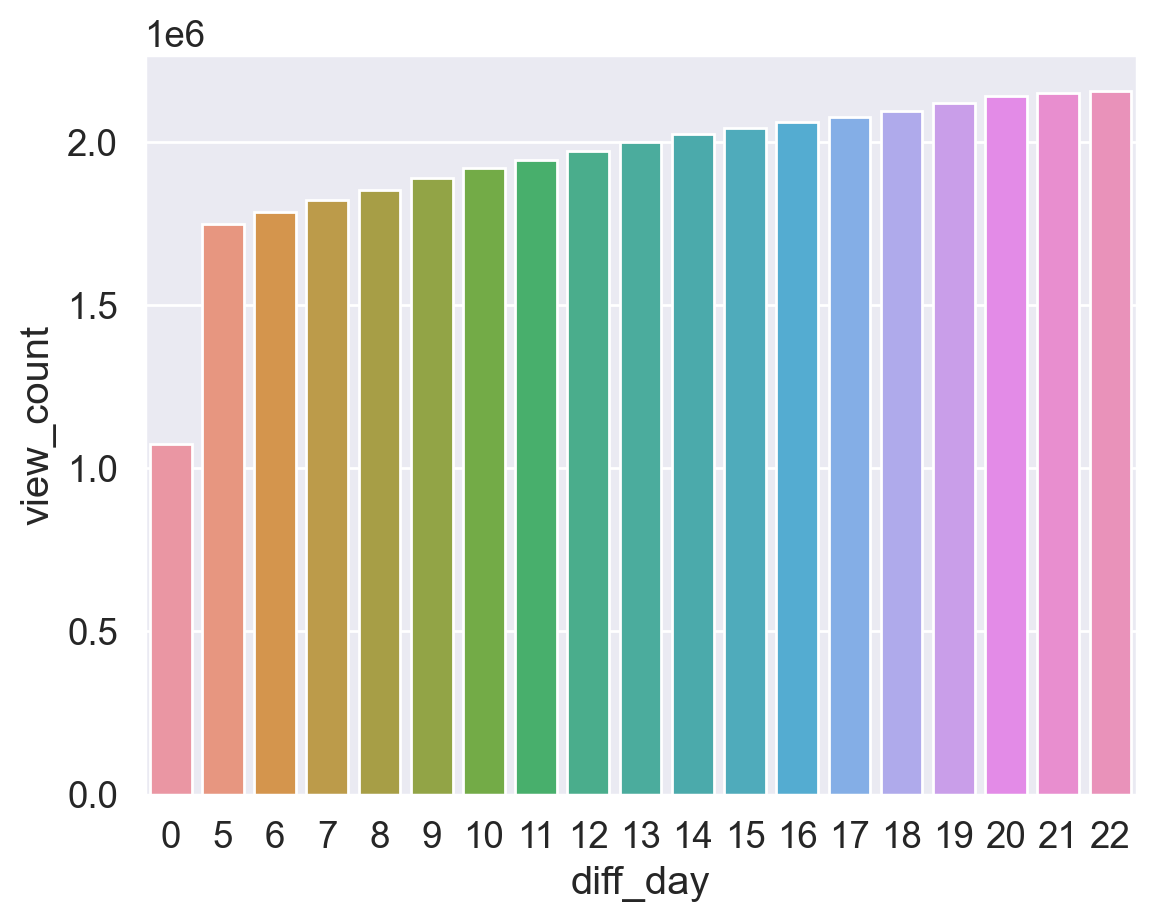

In [53]:
sns.barplot(instant_df.sort_values("diff_day"),
                x = "diff_day",
                y = "view_count",
               )

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9786 (\N{WHITE SMILING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128152 (\N{HEART WITH ARROW}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128060 (\N{PANDA FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


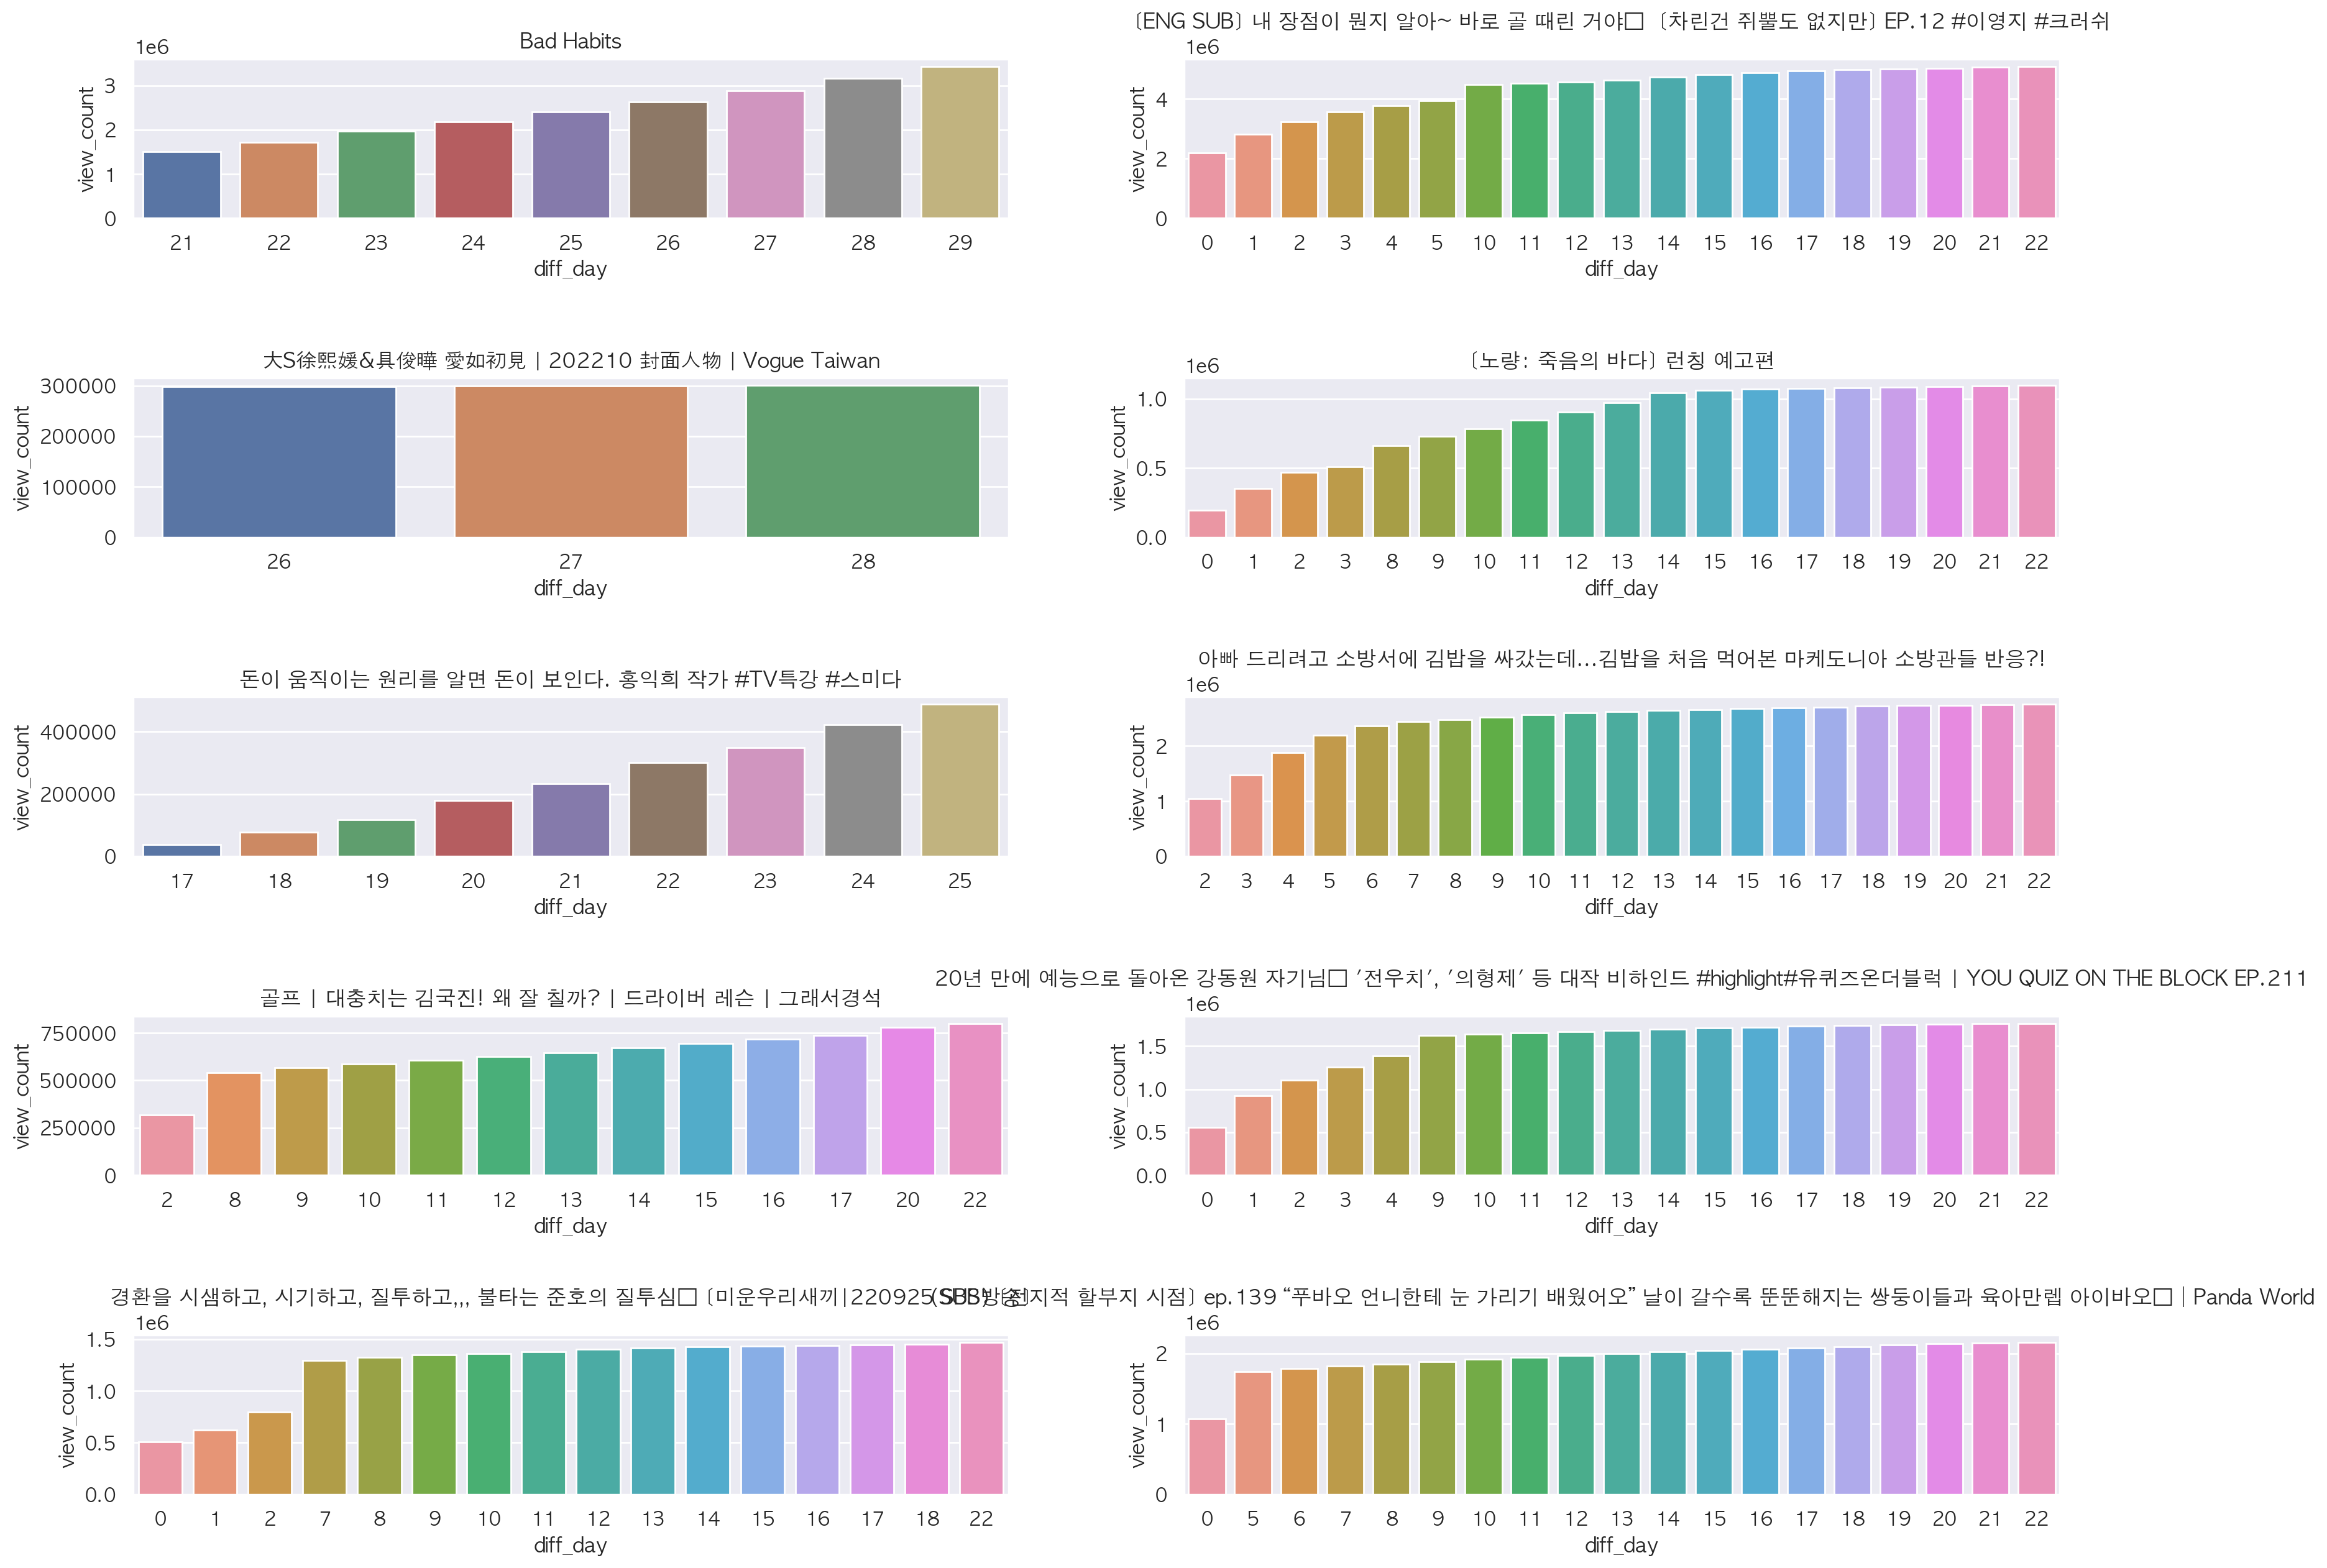

In [33]:
# 개별 예사를 보자
fig, ax = plt.subplots(ncols= 2, nrows = 5, figsize = (20, 15))
for i, title in enumerate(long_title_list):
    instant_df = df_youtube[df_youtube["title"] == title]
    sns.barplot(instant_df.sort_values("diff_day"),
                x = "diff_day",
                y = "view_count",
                ax = ax[i%5][int(i/5)]
               )
    ax[i%5][int(i/5)].set_title(title)
plt.subplots_adjust(hspace=1)
plt.show()

[ Q5. ]  
조회수의 급격한 변화는 대부분 5일 이내에 발생한다.  
일반적으로 10일 이후 큰 변화를 보이지 않는다.

### 3. 유튜브 급상승 동영상 카테고리 분석

In [35]:
def clean_time(time):
    y,m,d = time.split('T')[0].split('-')
    return datetime(int(y), int(m), int(d))

In [36]:
youtube_df = df_youtube_trending.copy()
youtube_df.trending_date = youtube_df.trending_date.apply(clean_time)
youtube_df.publishedAt = youtube_df.publishedAt.apply(clean_time)

In [37]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231954 entries, 0 to 231953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   video_id           231954 non-null  object        
 1   title              231954 non-null  object        
 2   publishedAt        231954 non-null  datetime64[ns]
 3   channelId          231954 non-null  object        
 4   channelTitle       231954 non-null  object        
 5   categoryId         231954 non-null  int64         
 6   trending_date      231954 non-null  datetime64[ns]
 7   tags               231954 non-null  object        
 8   view_count         231954 non-null  int64         
 9   likes              231954 non-null  int64         
 10  dislikes           231954 non-null  int64         
 11  comment_count      231954 non-null  int64         
 12  thumbnail_link     231954 non-null  object        
 13  comments_disabled  231954 non-null  bool    

In [38]:
def divide_datetime(df):
    df = df.copy()
    # publishedAt 컬럼을 연도, 월, 일로 분리
    df['publishedAt'] = pd.to_datetime(df['publishedAt'])
    df['published_year'] = df['publishedAt'].dt.year
    df['published_month'] = df['publishedAt'].dt.month
    df['published_day'] = df['publishedAt'].dt.day

    # trending_date 컬럼을 연도, 월, 일로 분리
    df['trending_date'] = pd.to_datetime(df['trending_date'])
    df['trending_year'] = df['trending_date'].dt.year
    df['trending_month'] = df['trending_date'].dt.month
    df['trending_day'] = df['trending_date'].dt.day

    # 날짜 차이 계산
    df['date_difference'] = (df['trending_date'] - df['publishedAt']).dt.days

    return df

In [39]:
youtube_df = divide_datetime(youtube_df)
youtube_df.head(1)

video_id        title publishedAt                 channelId  \
0  uq5LClQN3cE  안녕하세요 보겸입니다  2020-08-09  UCu9BCtGIEr73LXZsKmoujKw   

  channelTitle  categoryId trending_date       tags  view_count  likes  ...  \
0        보겸 BK          24    2020-08-12  보겸|bokyem     5947503  53326  ...   

   ratings_disabled  description       category  published_year  \
0             False          NaN  Entertainment            2020   

   published_month published_day trending_year  trending_month  trending_day  \
0                8             9          2020               8            12   

   date_difference  
0                3  

[1 rows x 24 columns]

Q6. 인급동에는 어떤 카테고리의 동영상이 많을까?

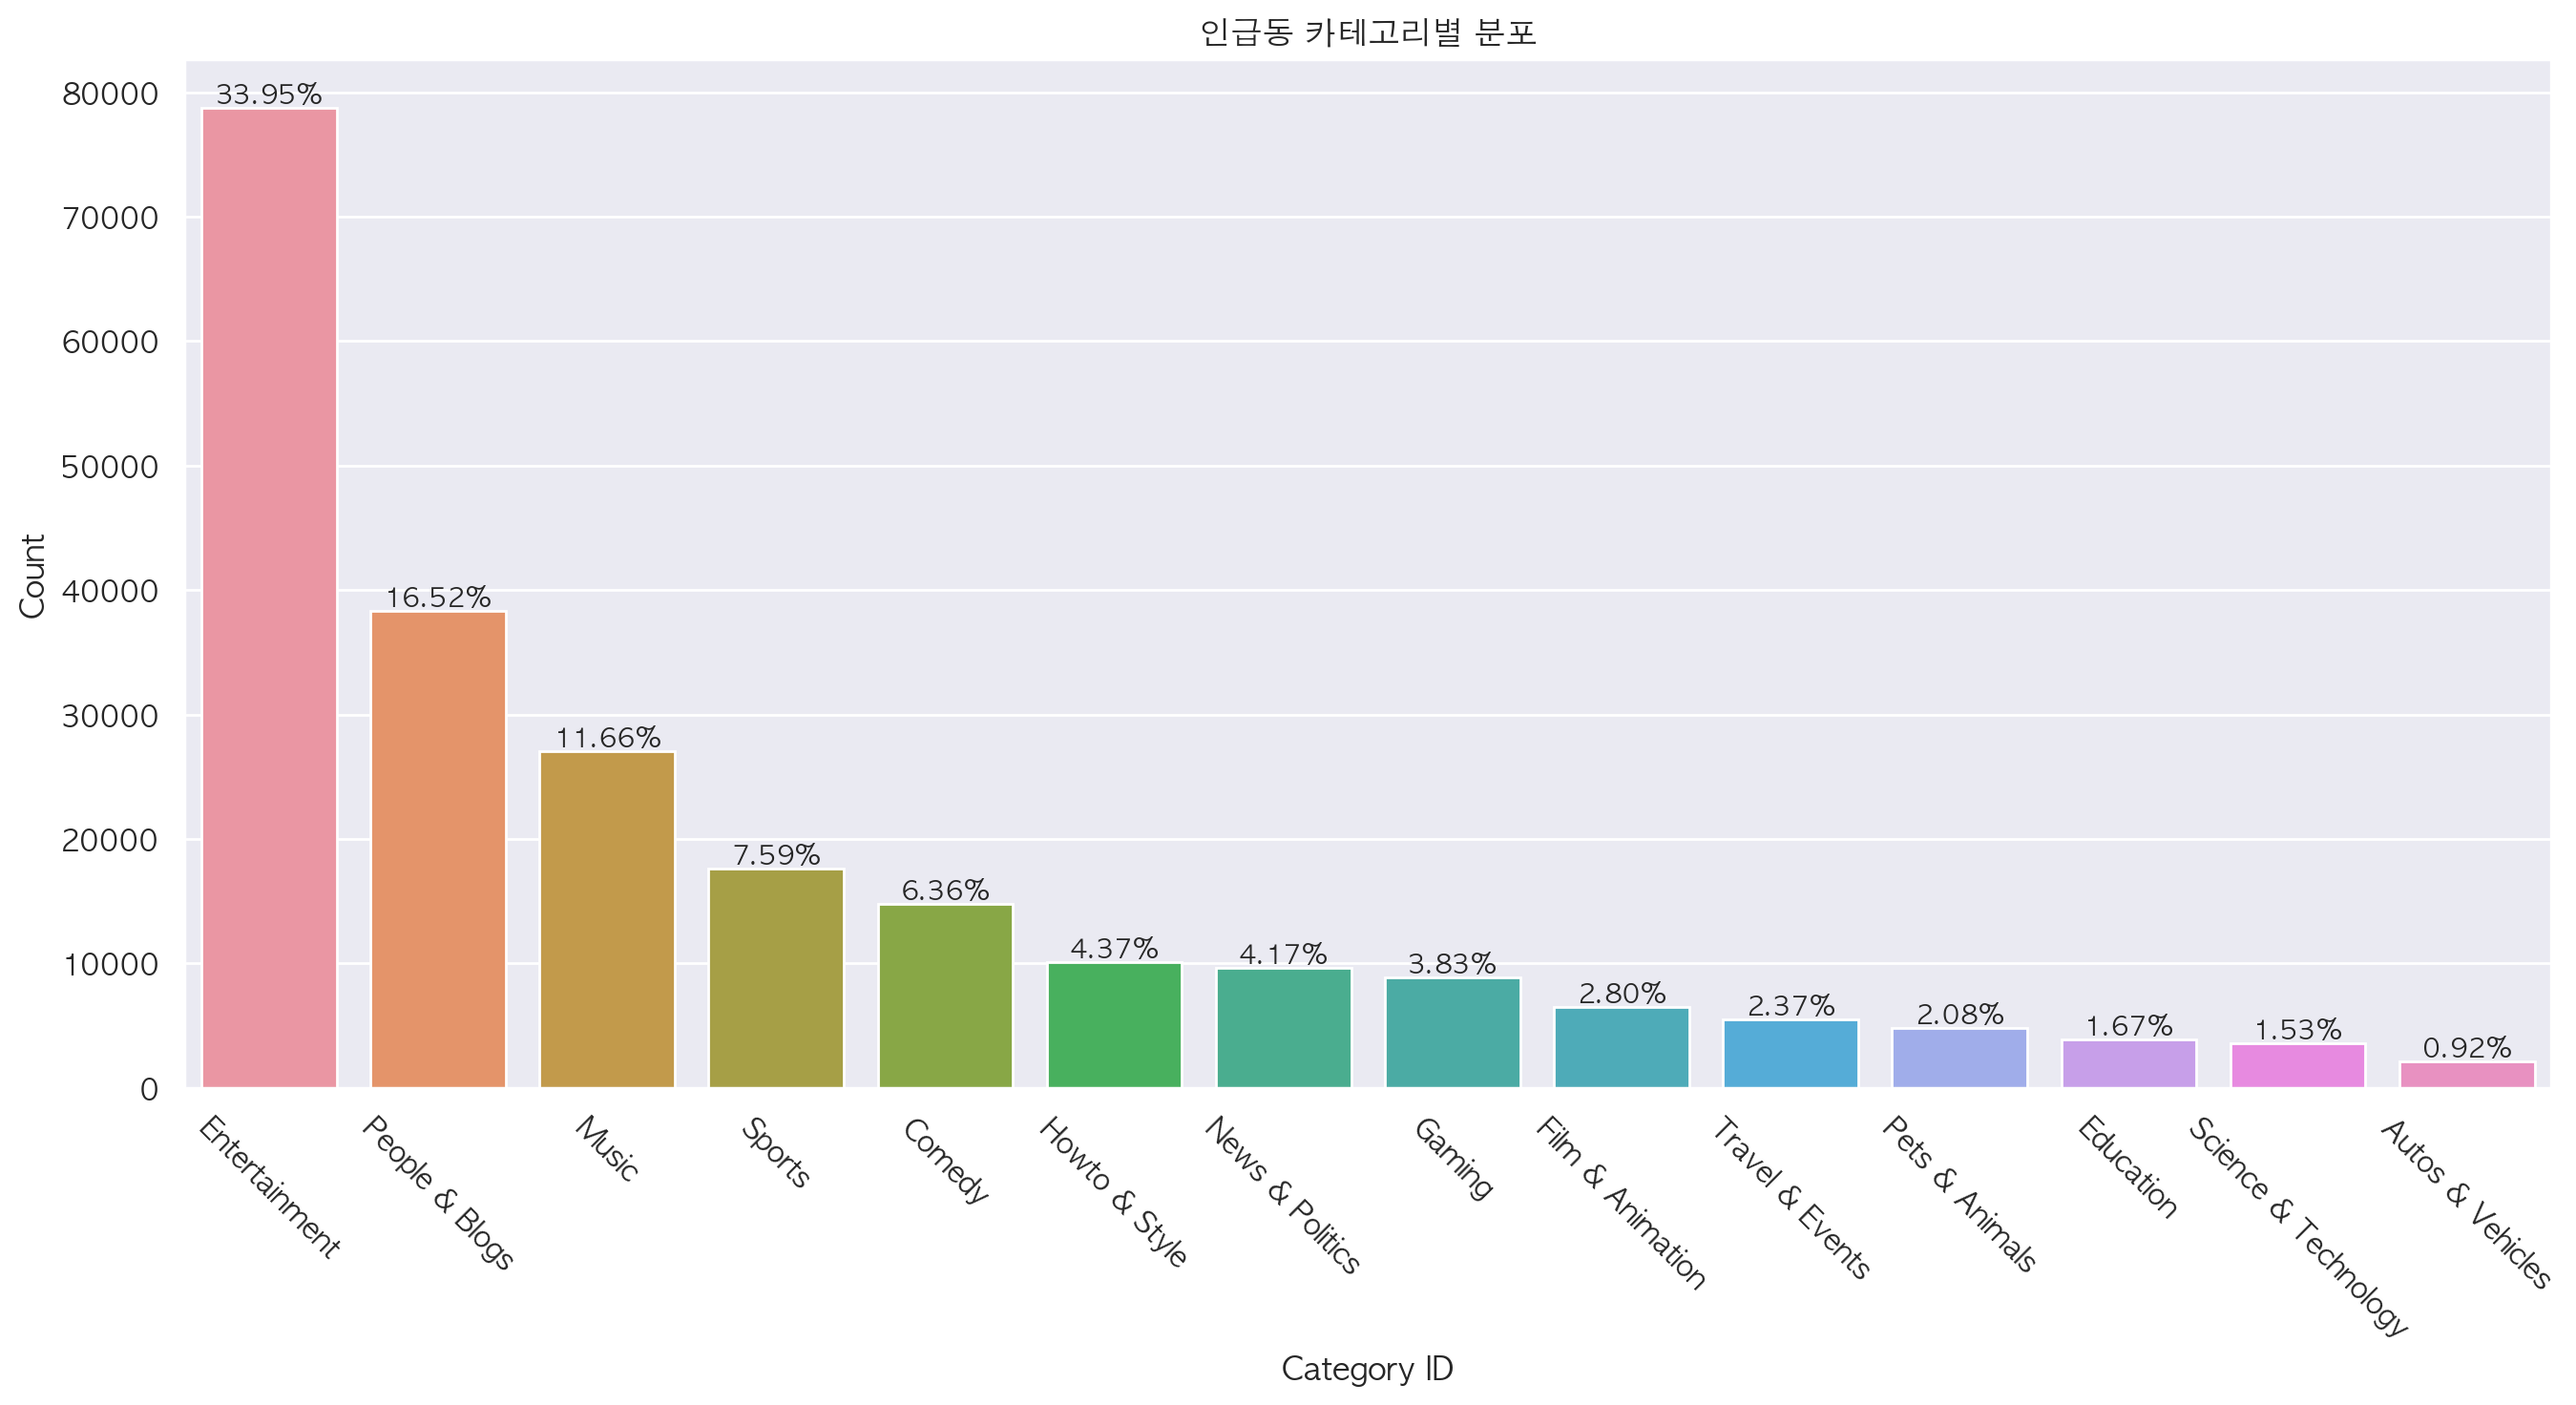

In [40]:
# 'category' 열을 주어진 딕셔너리를 사용하여 변경
youtube_df['categoryId'] = youtube_df['categoryId'].map(cat_dict)

# 'categoryId' 열의 값 수를 얻기
category_counts = youtube_df['categoryId'].value_counts()

# 시각화
plt.figure(figsize=(16, 7))
sns.countplot(data=youtube_df, x='categoryId', order=category_counts.index)
plt.xticks(rotation=-45)  # x축 라벨을 기울임
plt.title('인급동 카테고리별 분포')
plt.xlabel('Category ID')
plt.ylabel('Count')

# 카테고리 별 비율 텍스트 표시
total_videos = len(youtube_df)
for i, count in enumerate(category_counts):
    percentage = (count / total_videos) * 100
    plt.text(i, count, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10)

plt.show()

[ Q6. ]  
엔터테인먼트 33.95%, 일상블로그 16.52%로 주로 사람들이 즐기고 가볍게 소비할 수 있는 카테고리들이 상당부분 차지한다.

Q7. 인급동에 가장 자주 올라간 채널은?

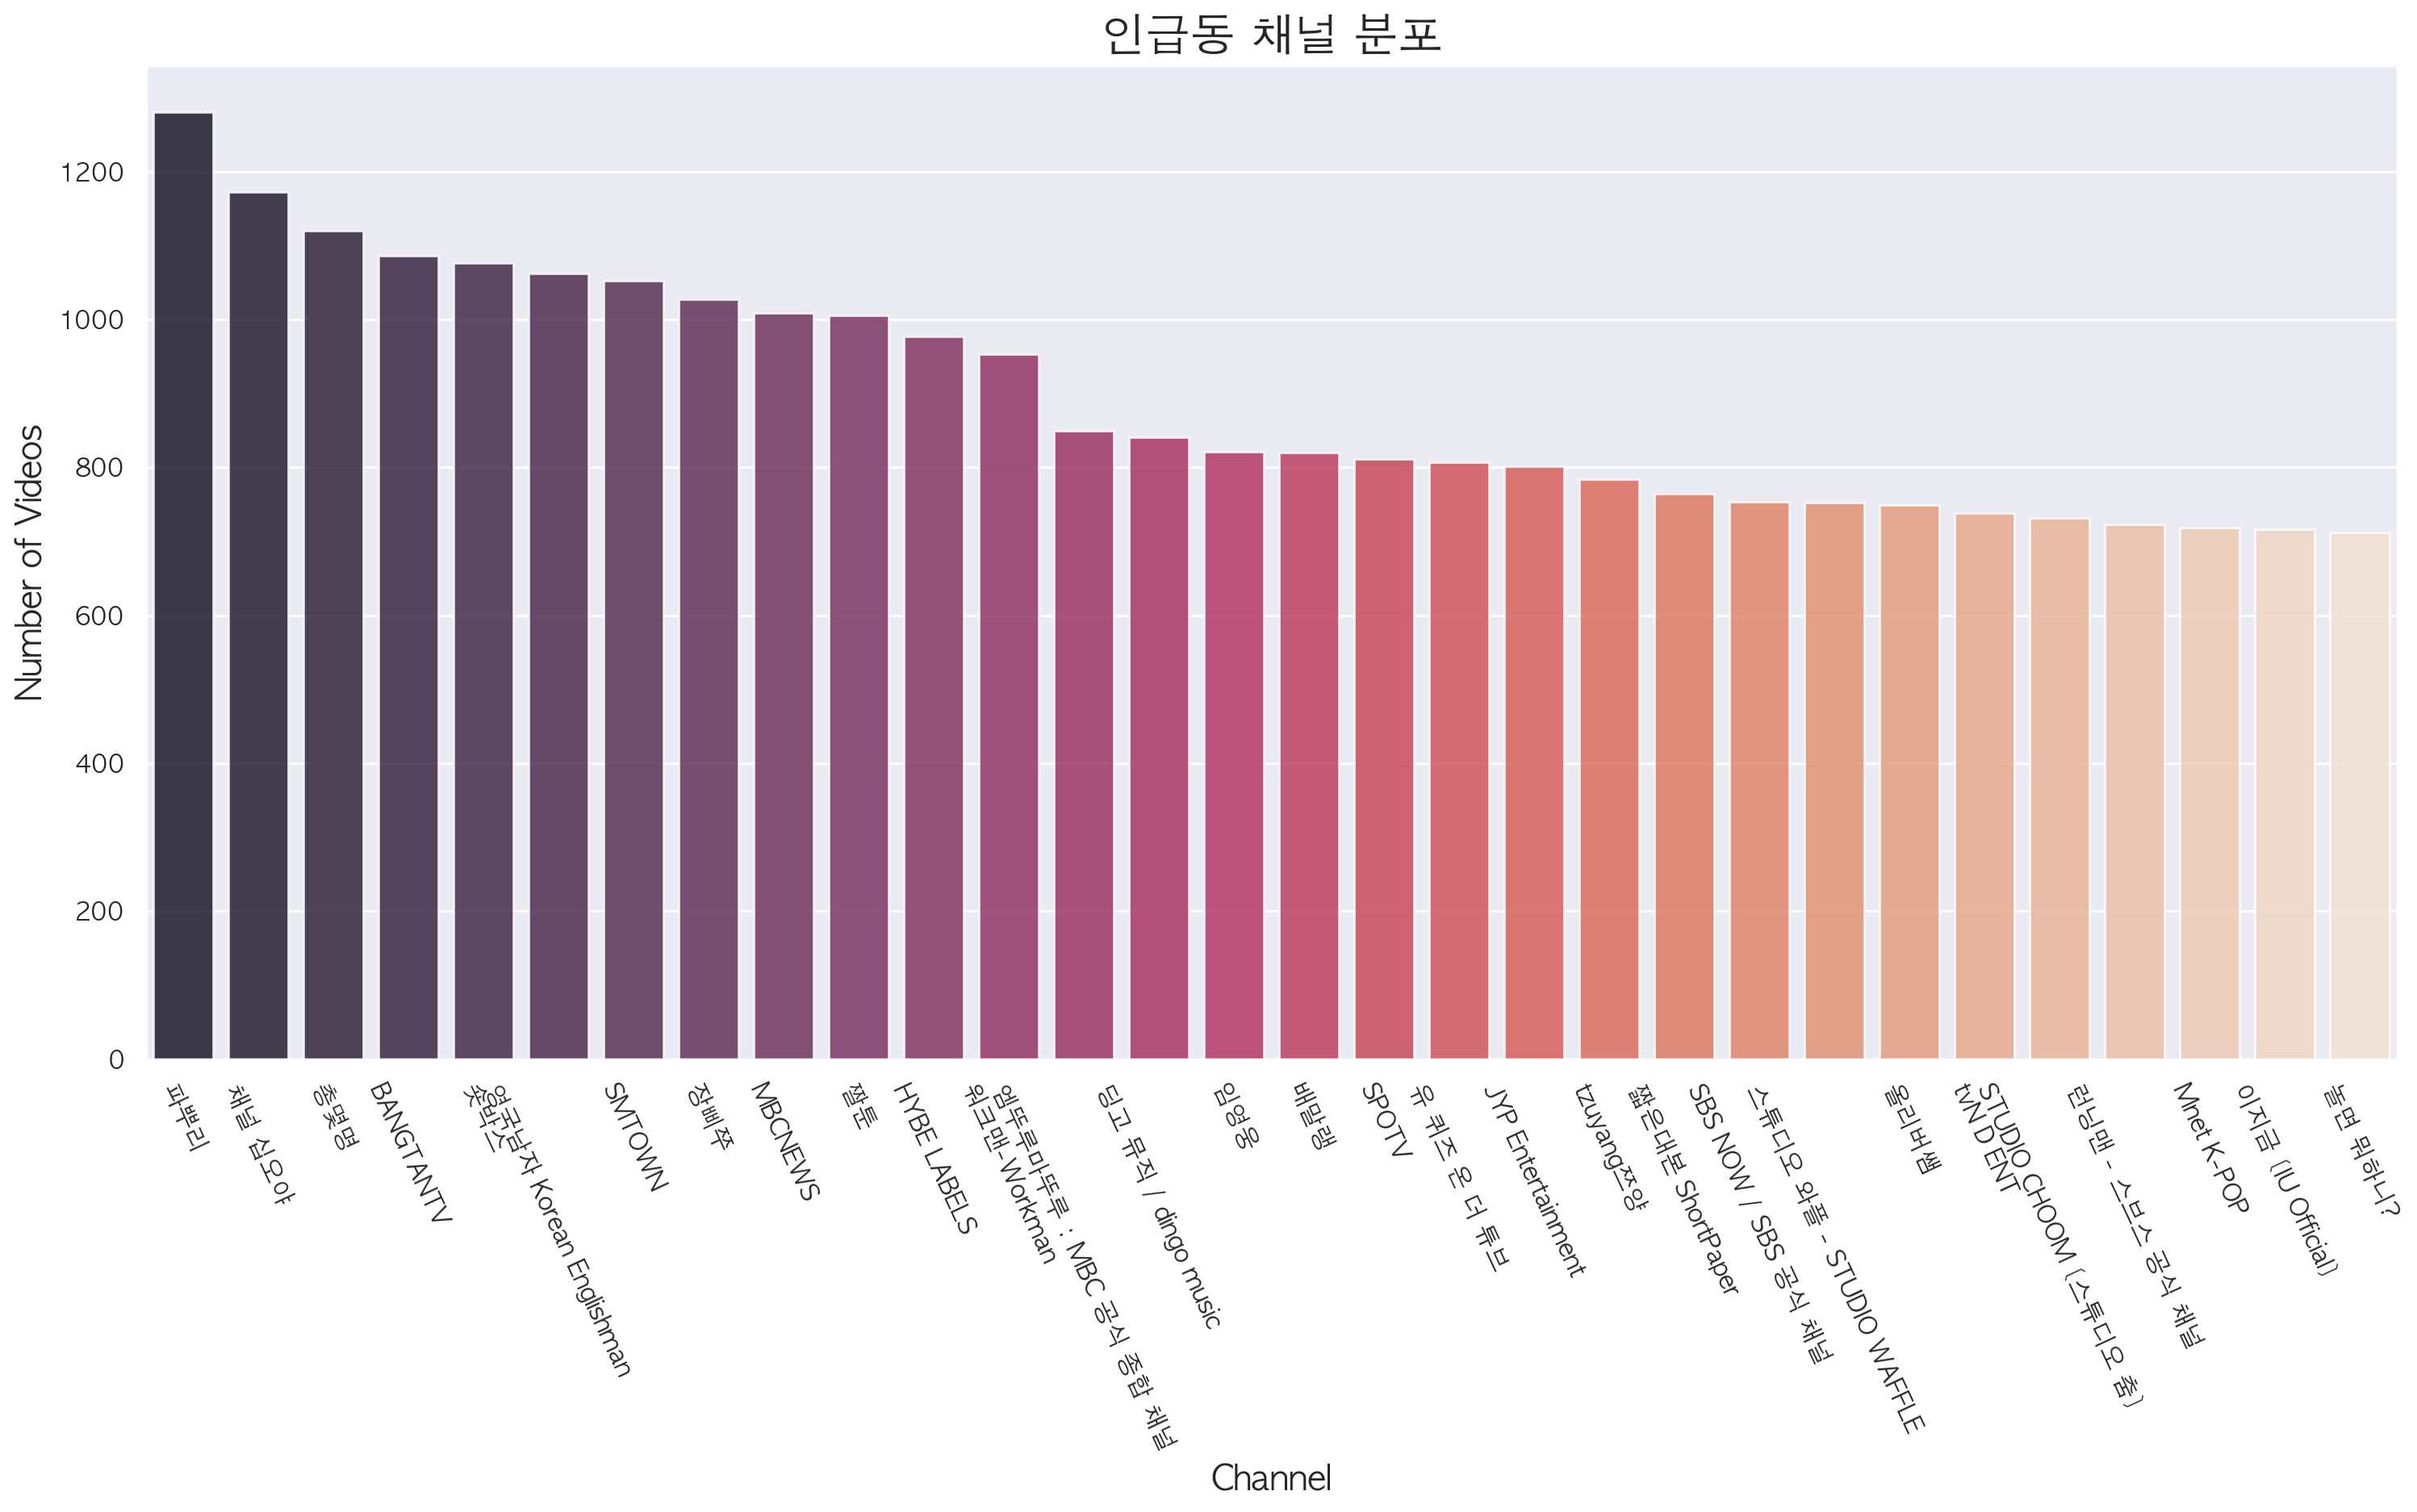

In [41]:
channel_freq = youtube_df['channelTitle'].value_counts()

channel_freq = channel_freq[:30]

plt.figure(figsize=(18,8))
sns.barplot(x=channel_freq.index, y=channel_freq.values, alpha=0.8, palette="rocket")
sns.set_style("darkgrid")
sns.set(font_scale=1.2)
plt.xticks(rotation=-65)
plt.xlabel('Channel', fontsize=15)
plt.ylabel('Number of Videos', fontsize=15)
plt.title('인급동 채널 분포', fontsize=20)
plt.show()

In [42]:
# top 30 채널명과 categoryId 출력
top_30_channels = youtube_df['channelTitle'].value_counts().head(30)

for channel, count in top_30_channels.items():
    category_id = youtube_df[youtube_df['channelTitle'] == channel]['categoryId'].iloc[0]
    print(f"{channel}  :  {category_id}")


파뿌리  :  Entertainment
채널 십오야  :  Entertainment
총몇명  :  Film & Animation
BANGTANTV  :  Music
숏박스  :  People & Blogs
영국남자 Korean Englishman  :  Comedy
SMTOWN  :  Music
장삐쭈  :  Comedy
MBCNEWS  :  News & Politics
짤툰  :  Film & Animation
HYBE LABELS  :  Music
워크맨-Workman  :  Music
엠뚜루마뚜루 : MBC 공식 종합 채널  :  Entertainment
딩고 뮤직 / dingo music  :  Music
임영웅  :  Music
배말랭  :  People & Blogs
SPOTV  :  Sports
유 퀴즈 온 더 튜브  :  Entertainment
JYP Entertainment  :  Music
tzuyang쯔양  :  People & Blogs
짧은대본 ShortPaper  :  Entertainment
SBS NOW / SBS 공식 채널  :  Entertainment
스튜디오 와플 - STUDIO WAFFLE  :  Entertainment
올리버쌤  :  Education
tvN D ENT  :  Entertainment
STUDIO CHOOM [스튜디오 춤]  :  Entertainment
런닝맨 - 스브스 공식 채널  :  Entertainment
Mnet K-POP  :  Entertainment
이지금 [IU Official]  :  Entertainment
놀면 뭐하니?  :  Entertainment


Q8. 카테고리별 조회수, 좋아요, 댓글은 어떤 양상을 보일까?

Text(0, 0.5, 'Average Comment Count')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing 

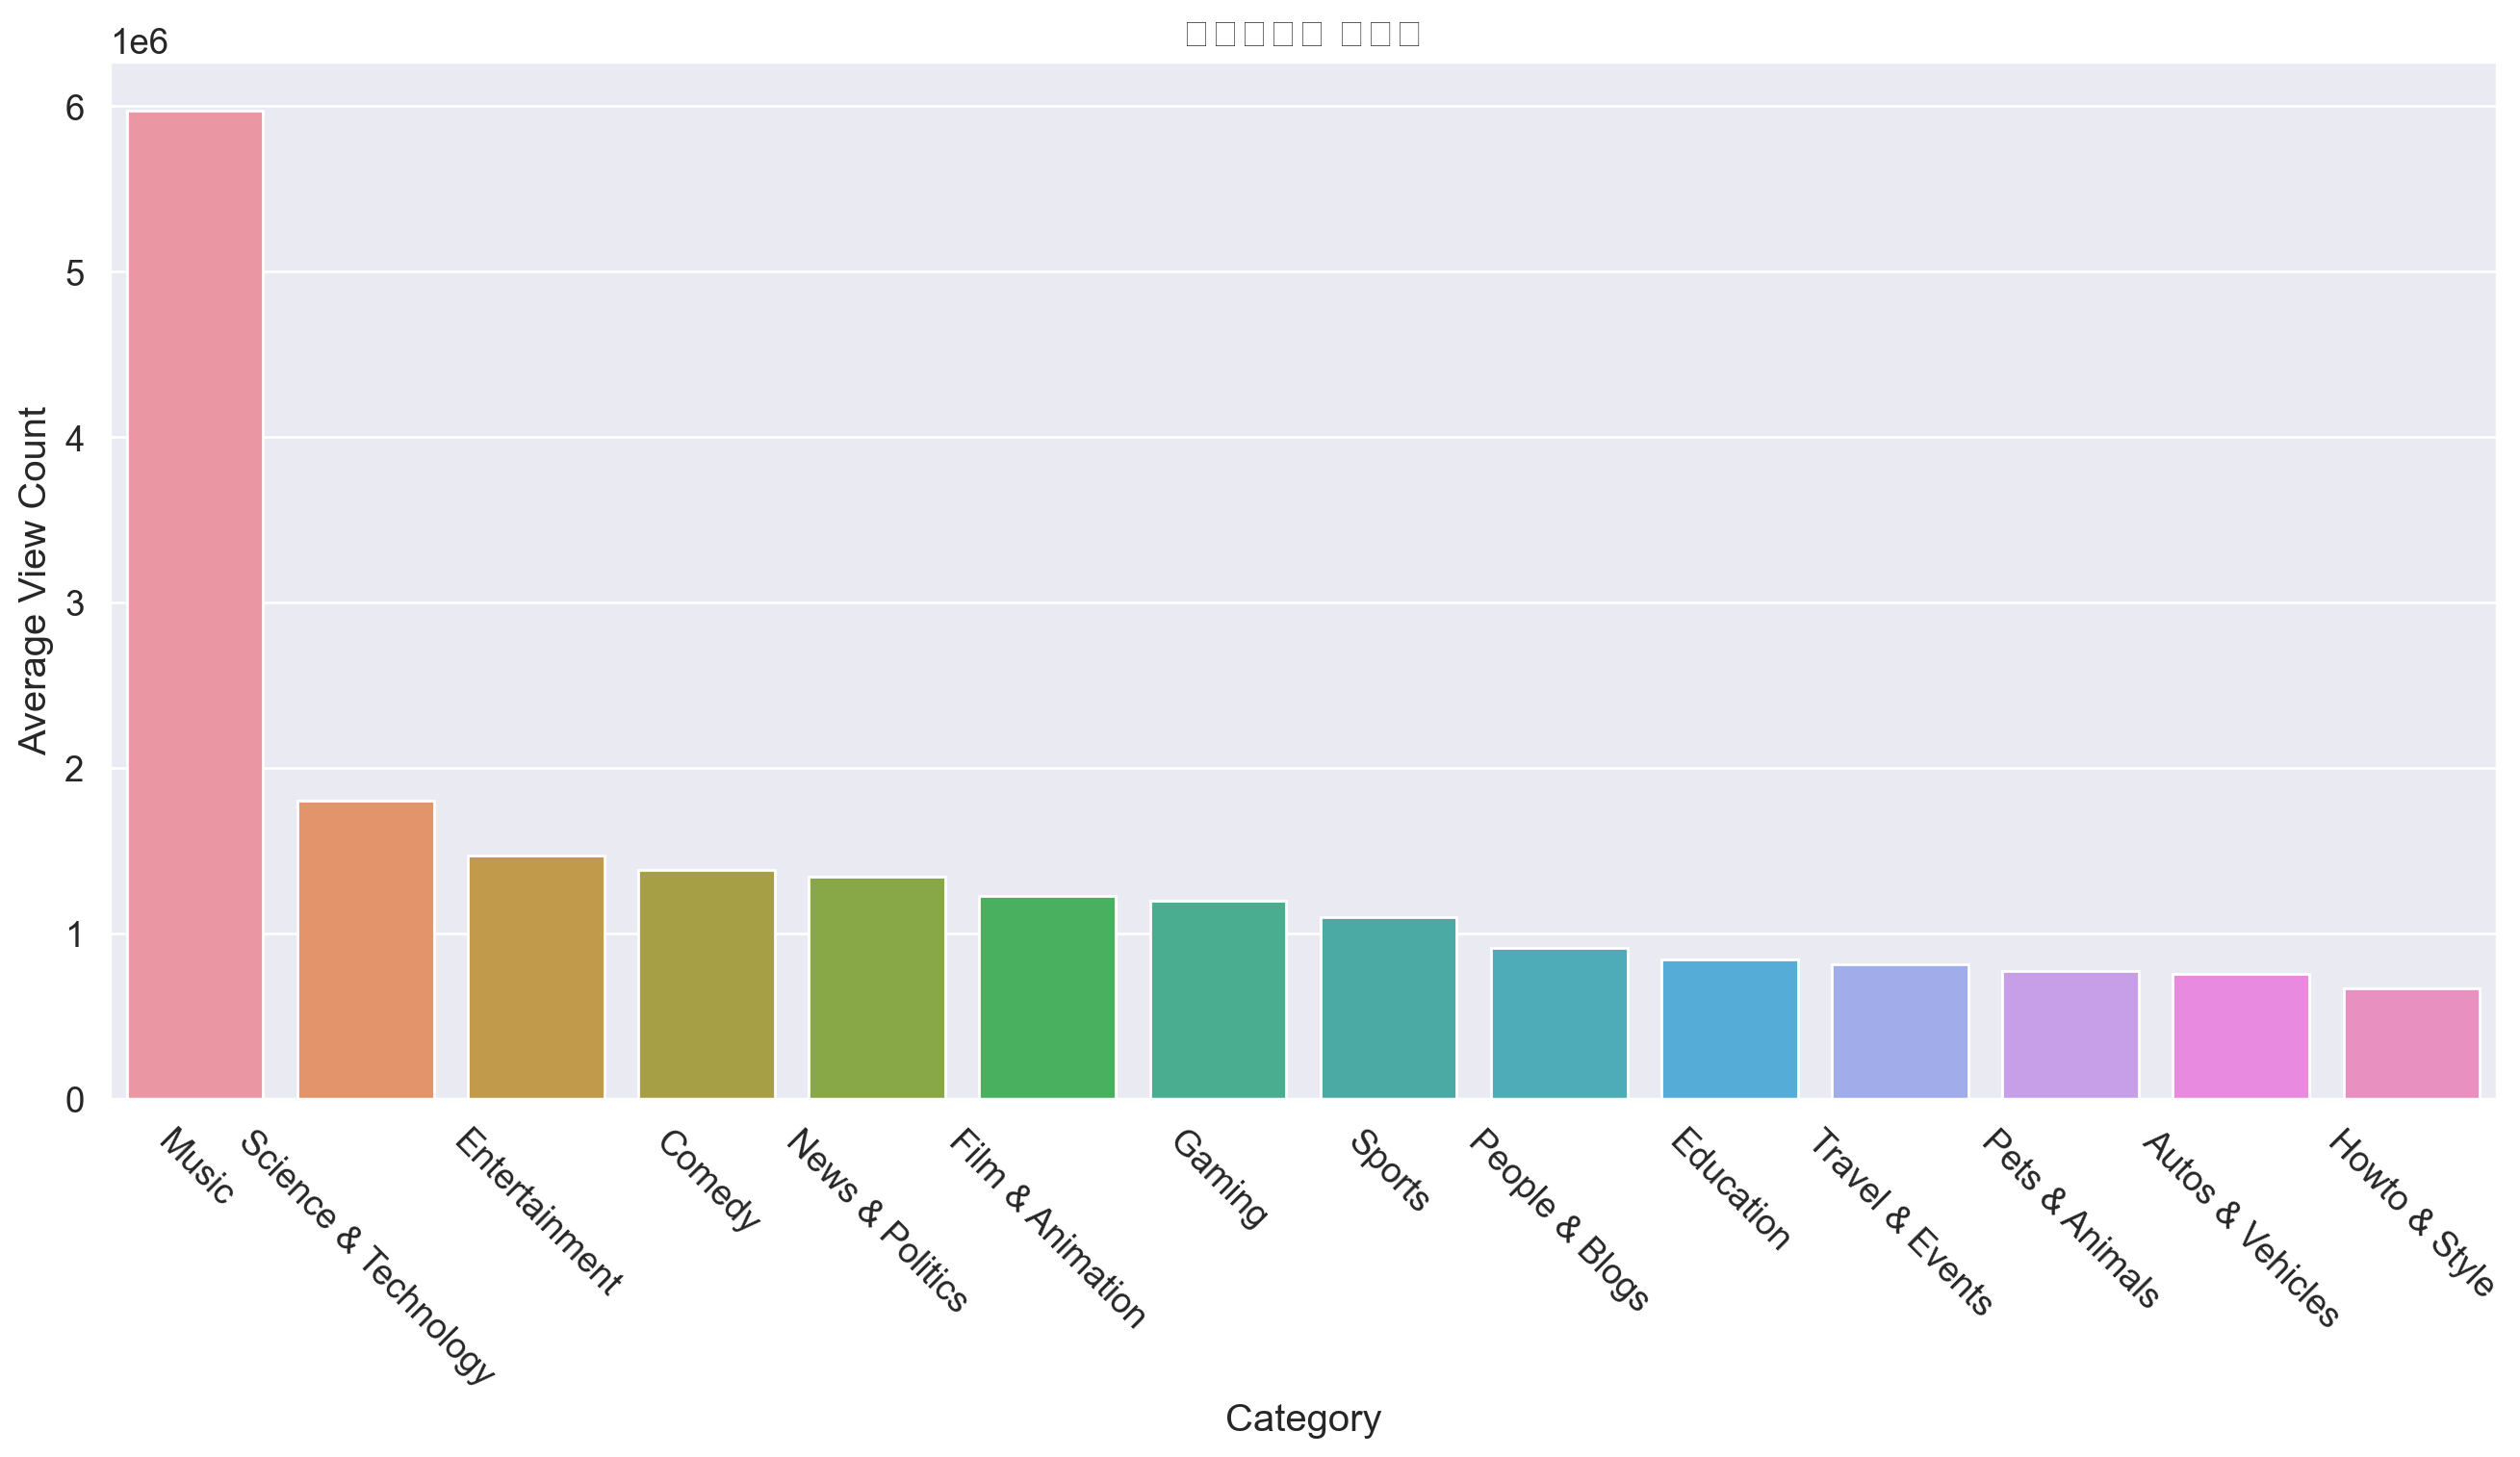

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51339 (\N{HANGUL SYLLABLE JOH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


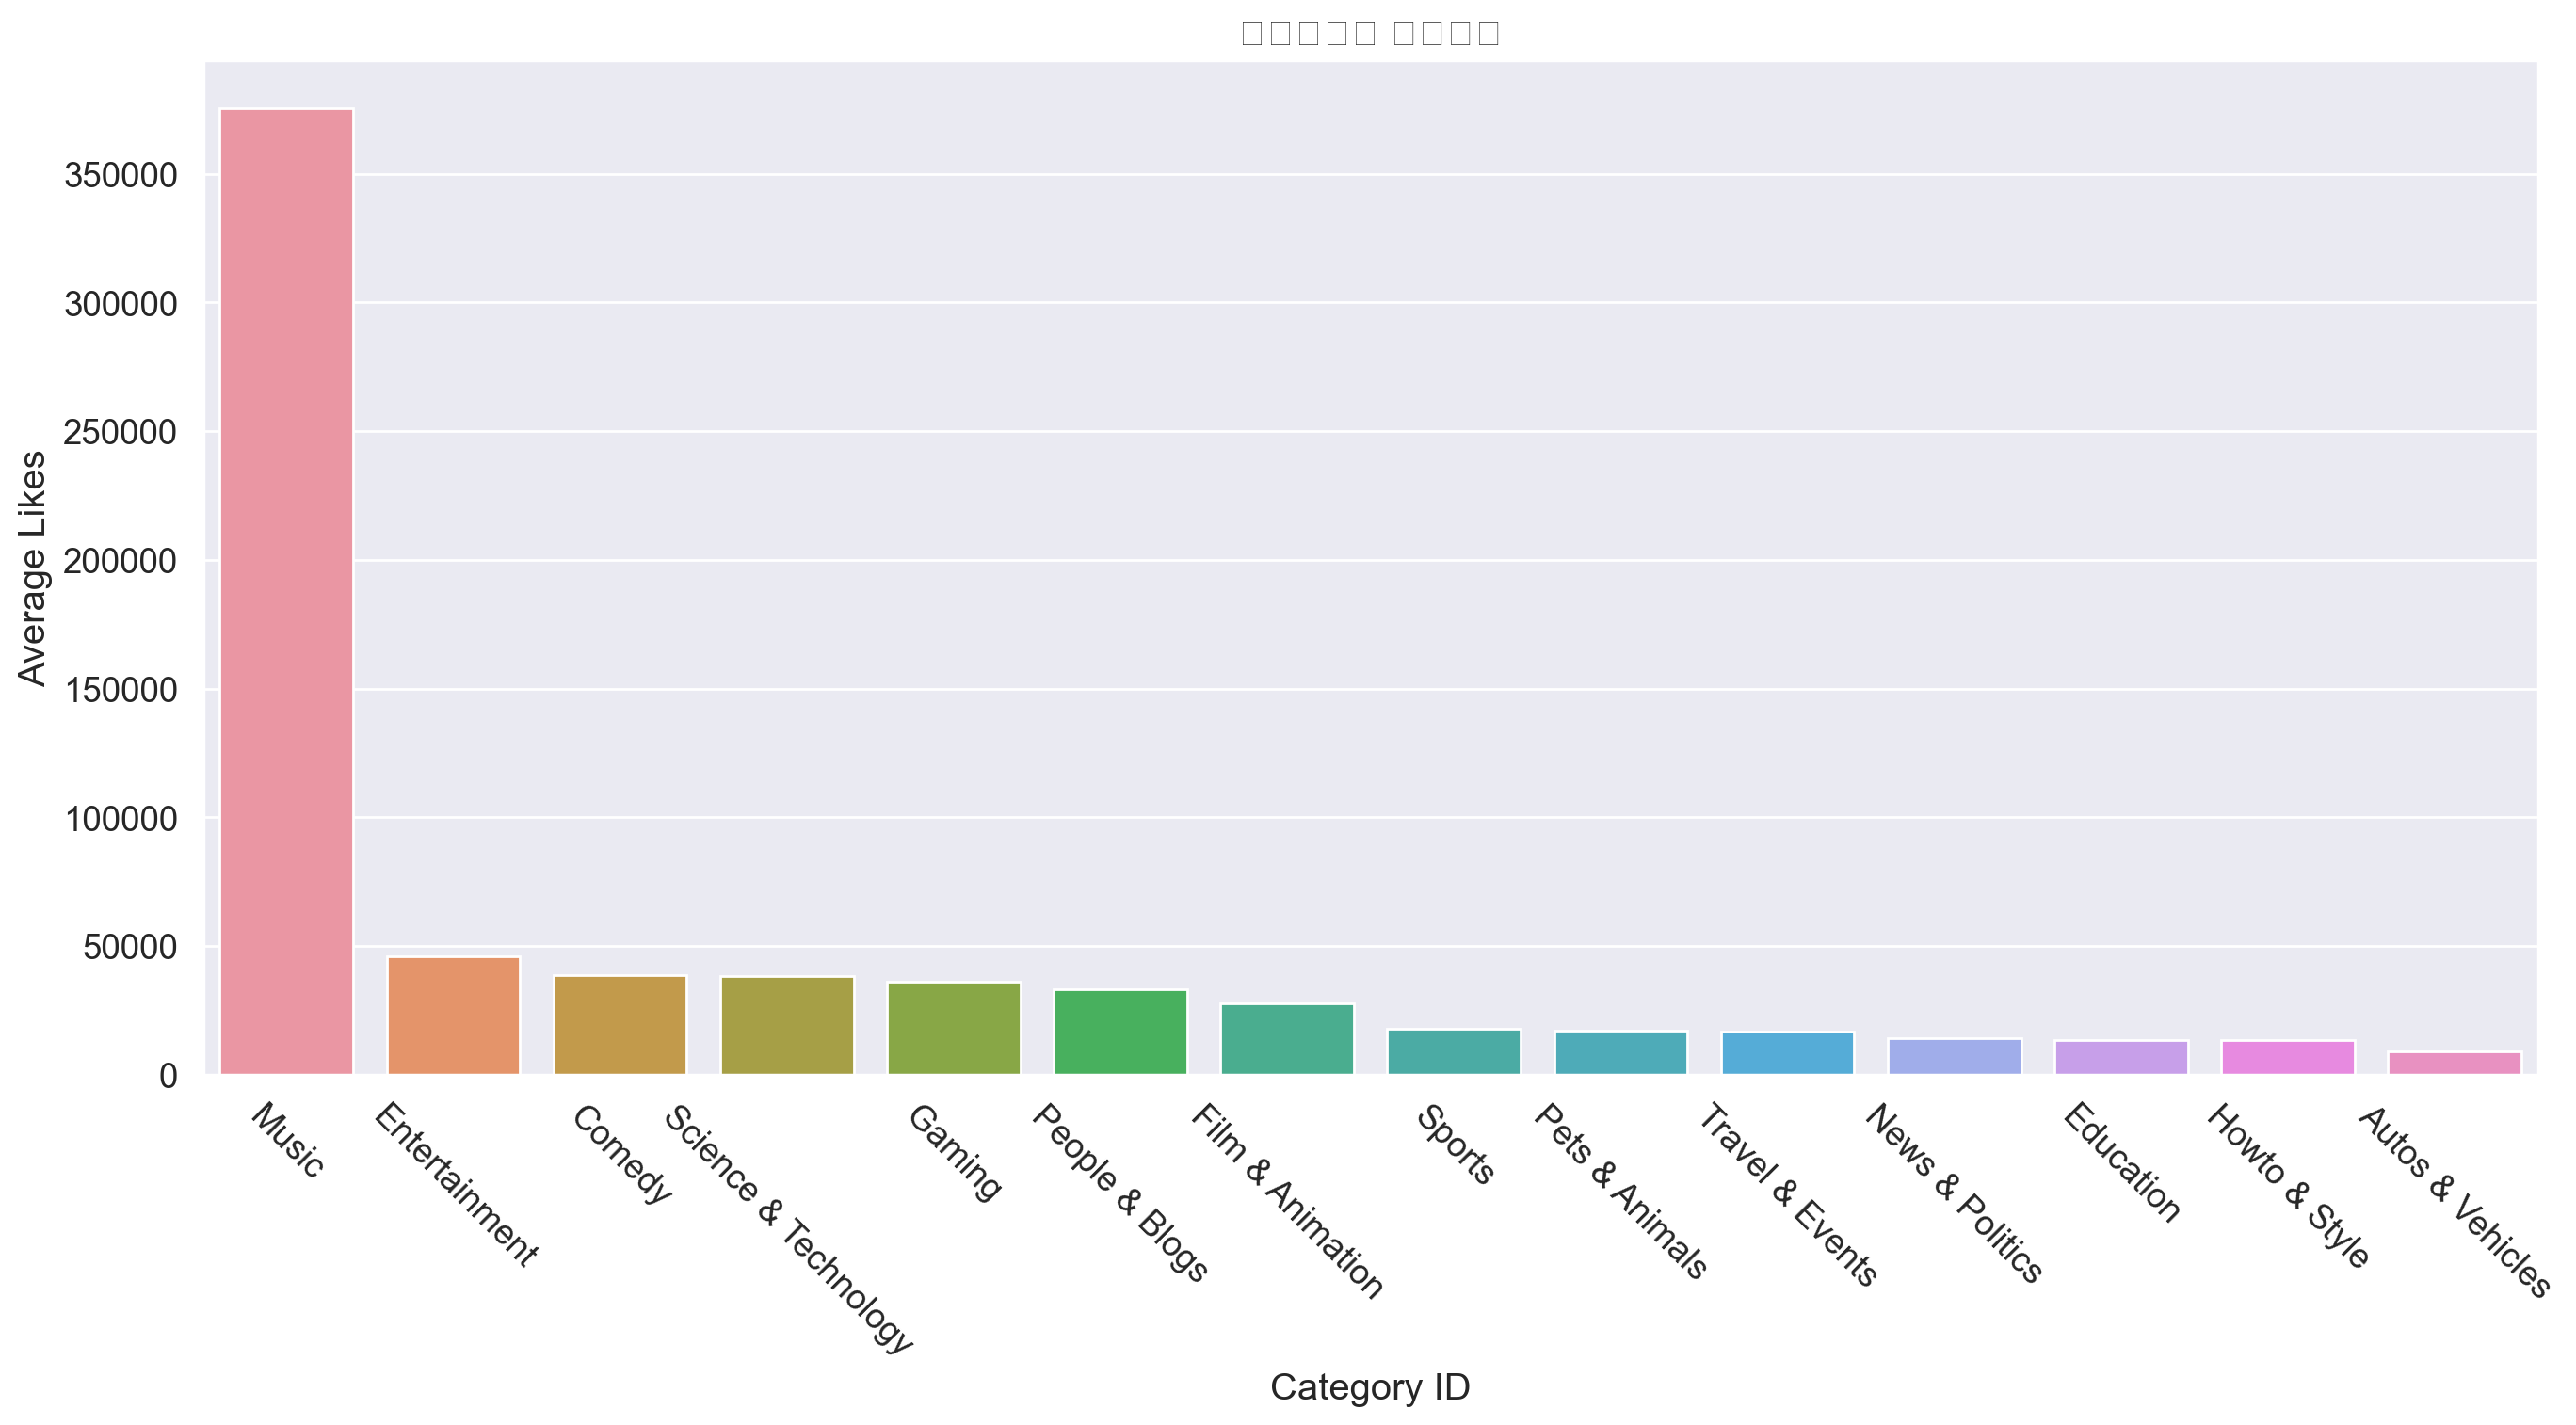

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45843 (\N{HANGUL SYLLABLE DAES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


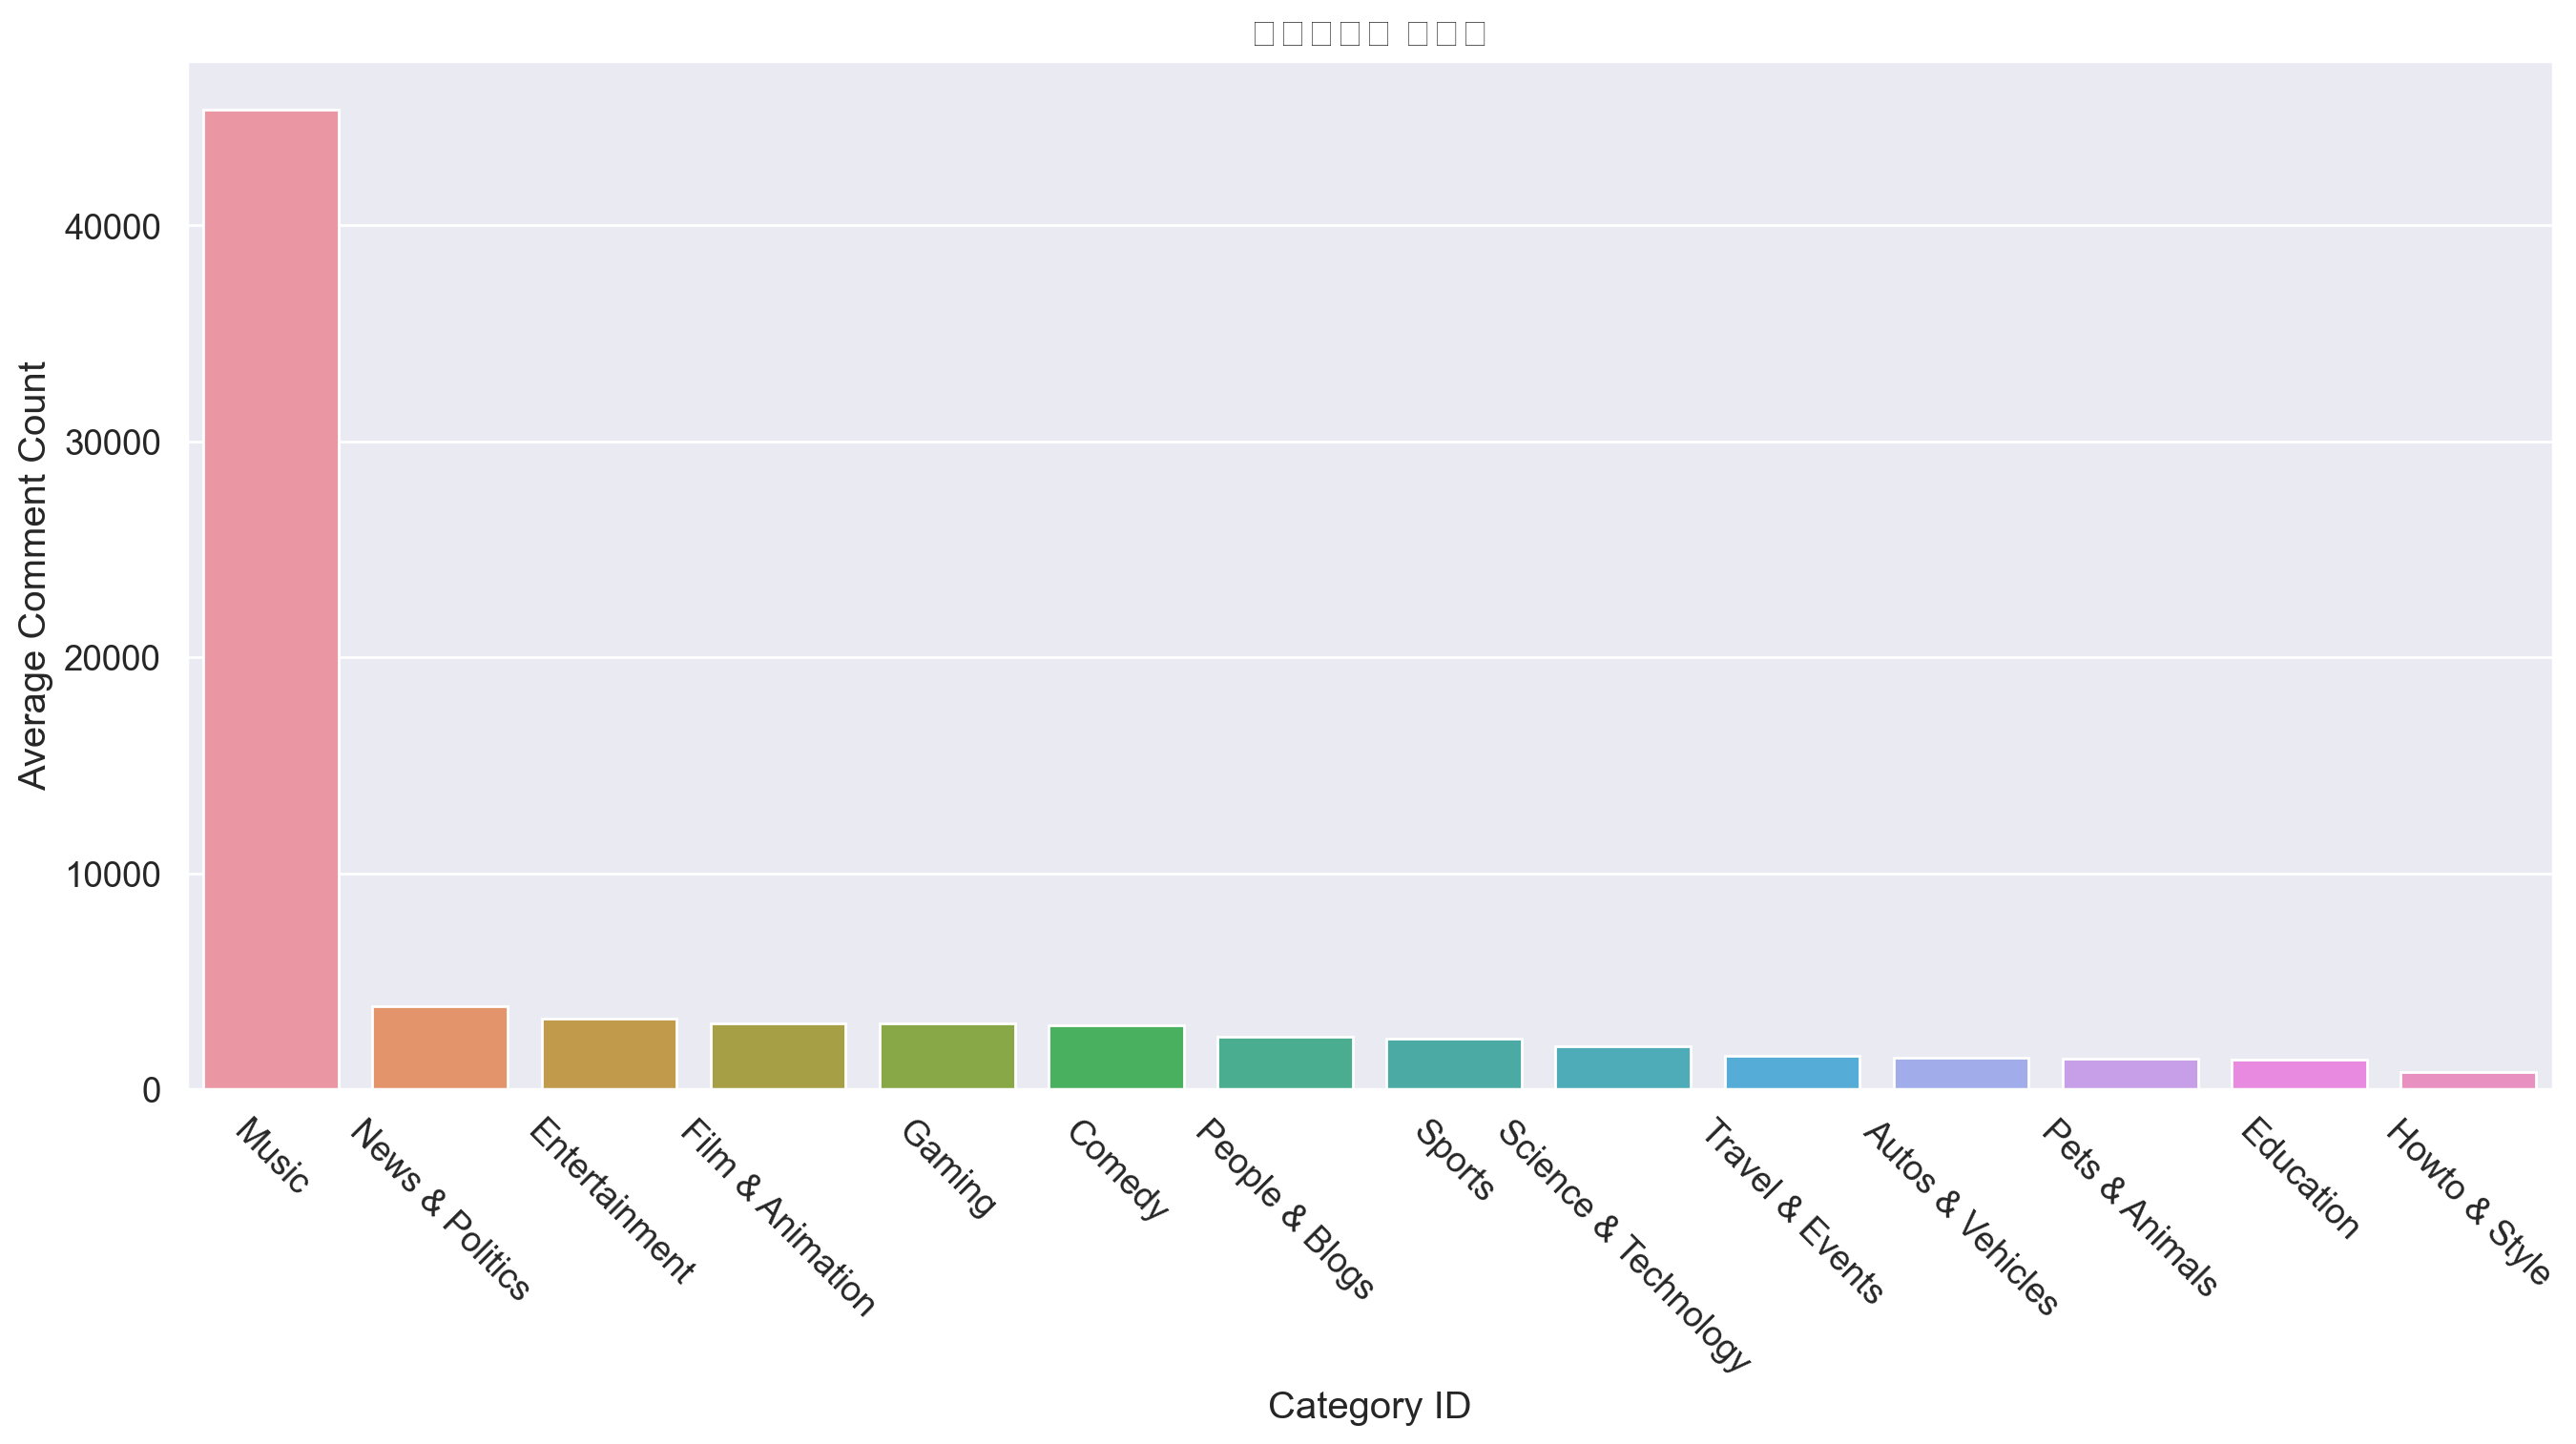

In [43]:
# 카테고리별 평균 view_count, likes, comment_count 계산
category_avg = youtube_df.groupby('categoryId')[['view_count', 'likes', 'comment_count']].mean().reset_index()

# 시각화
plt.figure(figsize=(16, 7))
sns.barplot(data=category_avg, x='categoryId', y='view_count', order=category_avg.sort_values('view_count', ascending=False)['categoryId'])
plt.xticks(rotation=-45)
plt.title('카테고리별 조회수')
plt.xlabel('Category')
plt.ylabel('Average View Count')

plt.figure(figsize=(16, 7))
sns.barplot(data=category_avg, x='categoryId', y='likes', order=category_avg.sort_values('likes', ascending=False)['categoryId'])
plt.xticks(rotation=-45)
plt.title('카테고리별 좋아요수')
plt.xlabel('Category ID')
plt.ylabel('Average Likes')

plt.figure(figsize=(16, 7))
sns.barplot(data=category_avg, x='categoryId', y='comment_count', order=category_avg.sort_values('comment_count', ascending=False)['categoryId'])
plt.xticks(rotation=-45)
plt.title('카테고리별 댓글수')
plt.xlabel('Category ID')
plt.ylabel('Average Comment Count')


[ Q8. ]  
음악을 반복해서 듣고 시간이 지나도 다시 찾는 경우 때문에 조회수, 좋아요, 댓글에서 압도적으로 많은 비율을 차지한다.  
과학&기술 관련 카테고리는 학습하기 위해서 다시한번 듣는것으로 유추된다. 한번 소비하고 마는 엔터테이먼트보다 평균 조회수가 더 많다.  
주로 사람들에게 즐거움을 주는 음악, 엔터테이먼트와 코메디의 좋아요수와 댓글이 많으며, 정치&정책관련해서는 의견공유 댓글이 많을 것으로 예상된다.

Q9. 어떤 동영상을 올리는 것이 유리할까? 연도별 인급동 카테고리 트렌드를 알아보자.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-

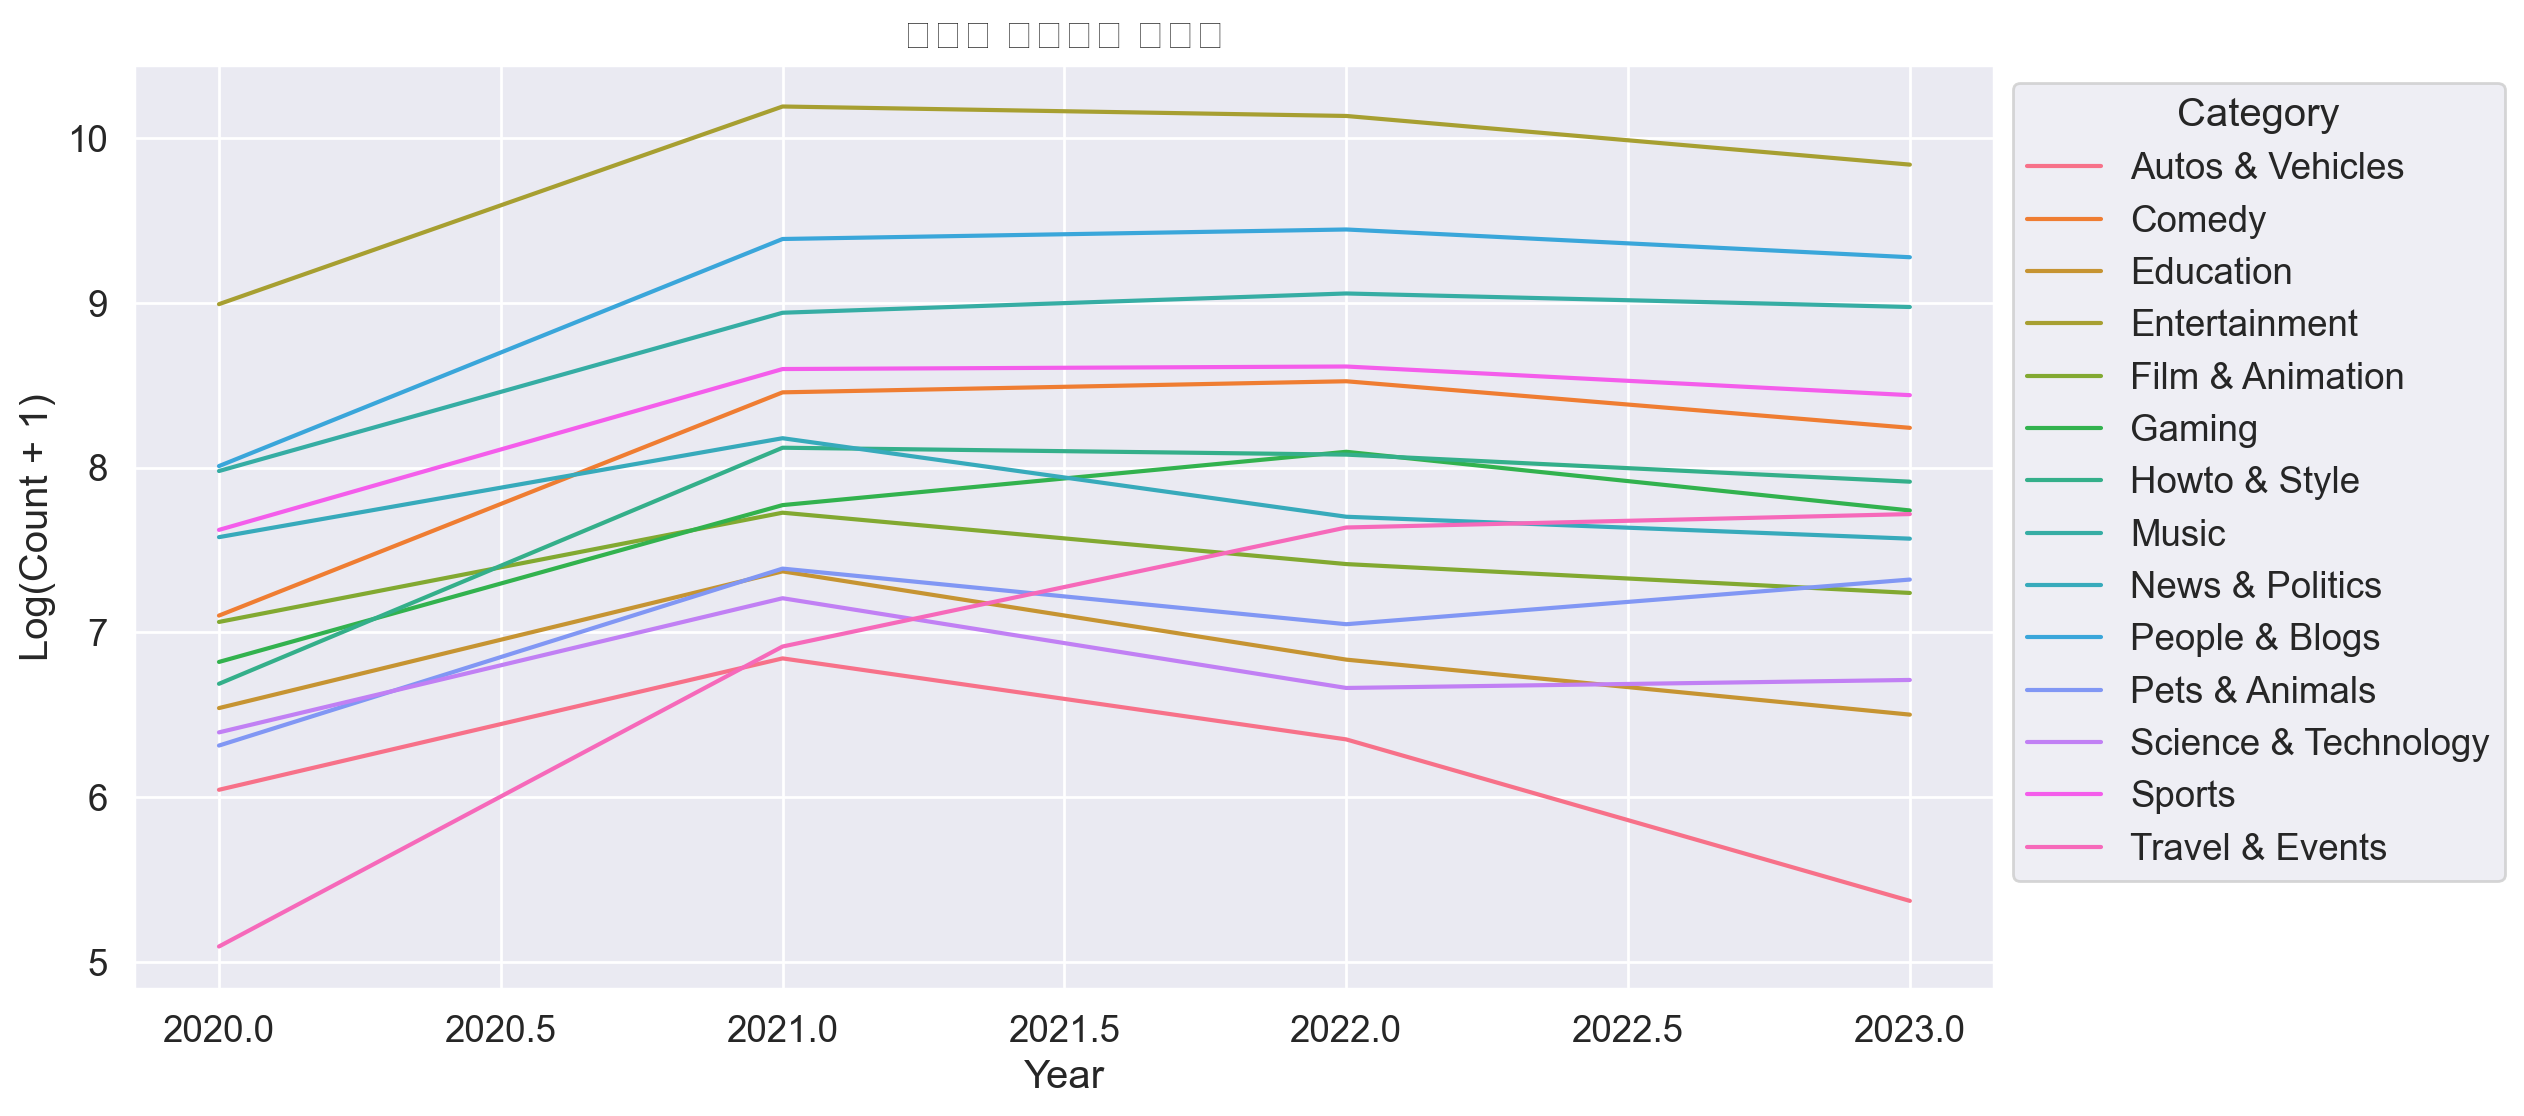

In [44]:
# 연도별 총 수가 다르기 떄문에 로그 스케일로 추이를 살펴보자.

# Trending year에 따른 categoryId의 추이를 계산
category_yearly_counts = youtube_df.groupby(['trending_year', 'categoryId']).size().unstack().fillna(0)

# 로그 변환 적용
category_yearly_counts_log = np.log1p(category_yearly_counts)

# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=category_yearly_counts_log, dashes=False)
plt.title('연도별 카테고리 트렌드')
plt.xlabel('Year')
plt.ylabel('Log(Count + 1)')  # Log(Count)에 1을 더해주는 이유는 0 값에 대한 로그 변환이 무한대로 발산하는 것을 피하기 위함입니다
plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


[ Q9 ]  
+ 여행 카테고리는 해가 지날수록 증가한다. 여행에 대한 관심이 많아지는 것을 알 수 있다.    
자동차&오토바이 관련 카테고리는 감소하는 모습을 볼 수 있었으며, 
나머지는 유지하거나 약간 감소하는 추세  
.
+ 엔터테인먼트와 일상 블로그, 음악 3가지 카테고리가 시간이 지나도 꾸준히 인기있는 카테고리인 것을 알 수 있다.


Q10. 카테고리별 제목을 파헤쳐 보자. 

In [45]:
from konlpy.tag import Okt  # KoNLPy의 Okt 형태소 분석기
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

In [46]:
# 한글과 영어만 남기고 나머지 문자 제거
data = youtube_df['tags'].str.replace('[^a-zA-Zㄱ-ㅎ가-힣 ]', ',', regex=True)
data

0                                                 보겸,bokyem
1                       총몇명,재밌는 만화,부락토스,루시퍼,총몇명 프리퀄,총몇명 스토리
2         양팡,양팡유튜브,팡튜브,가족시트콤,양팡가족,양팡가족시트콤,양팡언니,현실남매,현실자매...
3         꽈뚜룹,한국여행기,quaddurup,뚜룹이,korea,southkorea,vlog,...
4         JYP Entertainment,JYP,J,Y,Park,JYPark,박진영,선미,S...
                                ...                        
231949    이스라엘,팔레스타인,하마스,이스라엘 팔레스타인,가자지구,가자 지구,헤즈볼라,알아크사...
231950    꼬꼬무,꼬리에꼬리를무는그날이야기,SBS교양,SBS달리,장도연,장현성,장성규,SBS,...
231951    선미,선미 신곡,선미 솔로,선미 컴백,SUNMI,STRANGER,,theKILLPO...
231952    ,여행유튜버,,세계여행유튜버,,해외여행유튜버,,세계여행,,해외여행,,배낭여행,,유맥...
231953    KBS,KPOP,뮤직,KBSKPOP,K,POP,케이팝,kpop,KBSKpop,음악,...
Name: tags, Length: 231954, dtype: object

In [47]:
# 가장 많이 사용된 태그 N개 추출
def get_top_tags(tags, n=50):
    tags = tags.split("|")  # 태그를 분리
    tag_counter = Counter(tags)
    top_tags = tag_counter.most_common(n)
    return [tag[0] for tag in top_tags]

# 카테고리별로 가장 많이 사용된 태그 N개 추출
top_tags_by_category = youtube_df.groupby('categoryId')['tags'].apply(lambda x: get_top_tags(" ".join(x)))


In [48]:
top_tags_by_category

categoryId
Autos & Vehicles        [자동차, 시승기, 블랙박스, 현대자동차, 수입차, 현대차, 맨인블랙박스, 국산차,...
Comedy                  [스케치코미디, 웃긴영상, 웃긴, 코미디, 숏박스, 개그, 라면, food, 도전,...
Education               [조승연의 탐구생활, 아이템의인벤토리, 드립, 유래, 어디서, 투자, 주식, 조승연...
Entertainment           [예능, 먹방, 유재석, 레전드, tvN, 아이돌, kpop, 연애, 하하, 드라마...
Film & Animation        [만화, 애니메이션, 병맛, 더빙, 웹툰, 병맛더빙, ㅋㅋㅋ, 영상툰, animat...
Gaming                  [리그오브레전드, 롤챔스, 롤드컵, t1, 게임, 티원, skt, 매드무비, T1,...
Howto & Style           [반찬, 간단요리, 요리, 레시피, 만들기, 한식, 자취요리, 쉬운요리, makin...
Music                   [BTS, 아이돌, 음악, kpop, MV, KPOP, 뮤비, idol, BANGT...
News & Politics         [뉴스, news, 뉴스데스크, MBC뉴스, 뉴스투데이, 아침뉴스, 정오뉴스, ne...
People & Blogs          [먹방, 브이로그, mukbang, vlog, 일상, 부부, 요리, 맛집, 커플, ...
Pets & Animals          [강아지, 포메라니안, 동물농장, cat, 고양이, 반려견, dog, 애니멀봐, 동...
Science & Technology    [언더케이지, 과학, 테크, 스마트폰, 언케, 아이폰, 테크리뷰, 애플, 갤럭시, ...
Sports                  [손흥민, 토트넘, 축구, 스포츠, 스포티비, 프리미어리그, 이강인, 헬스, 해외축...
Travel & Events         [여행

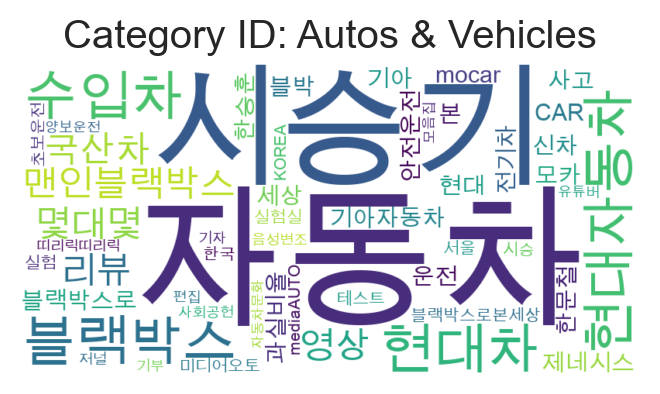

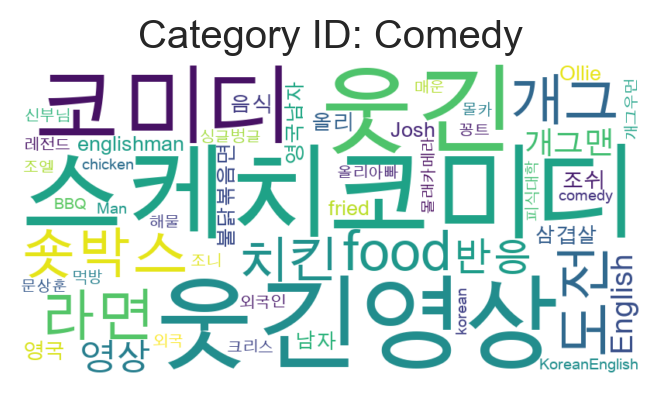

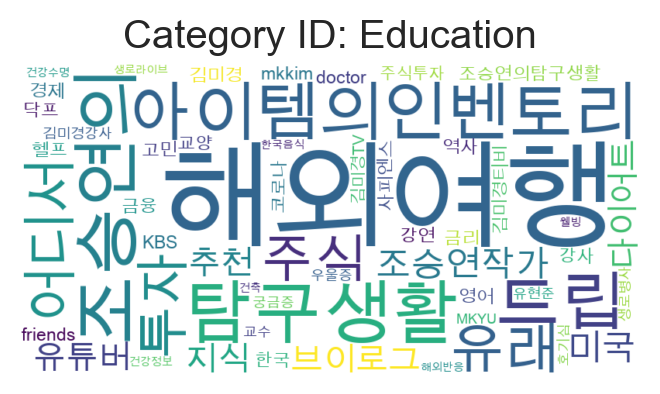

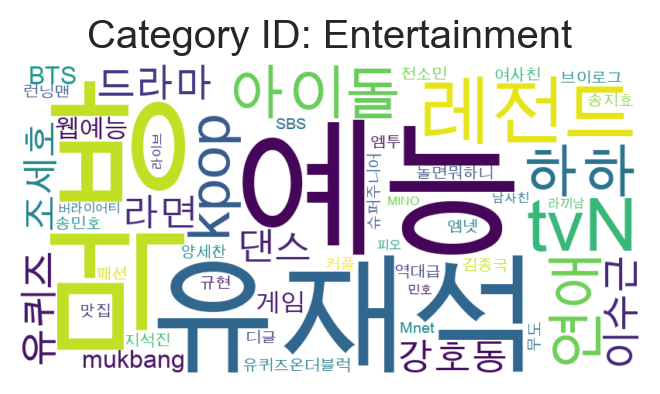

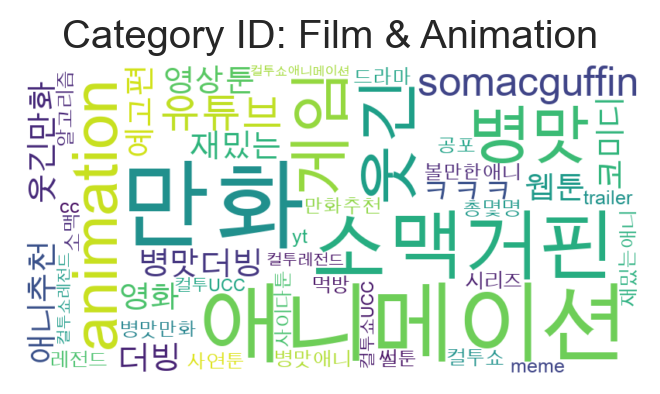

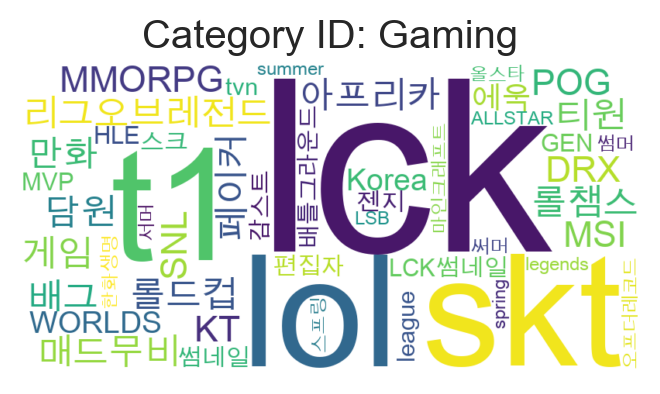

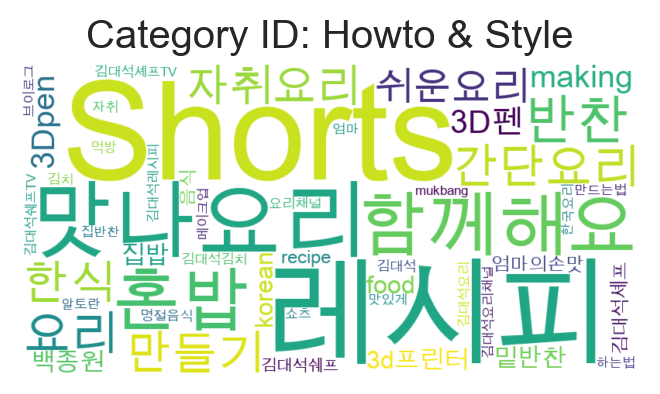

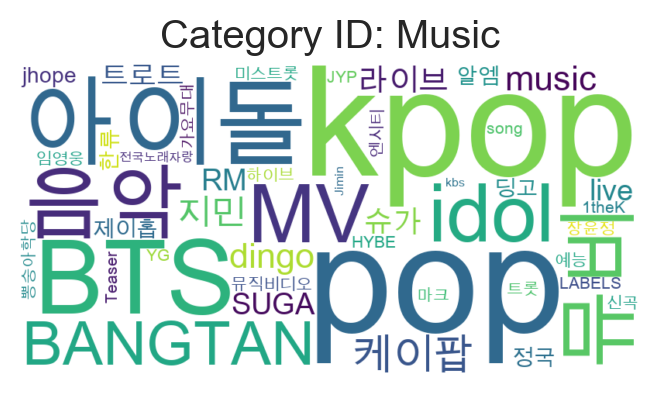

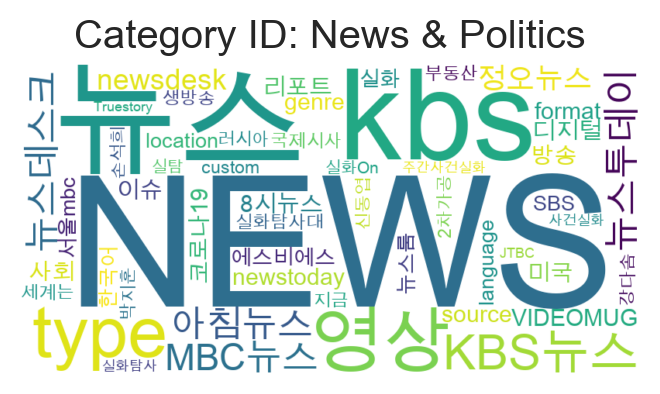

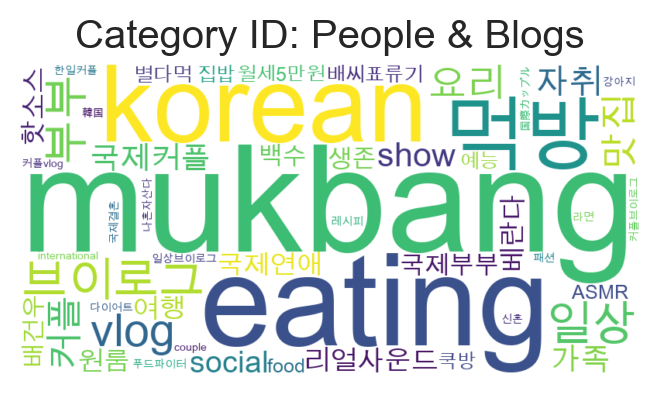

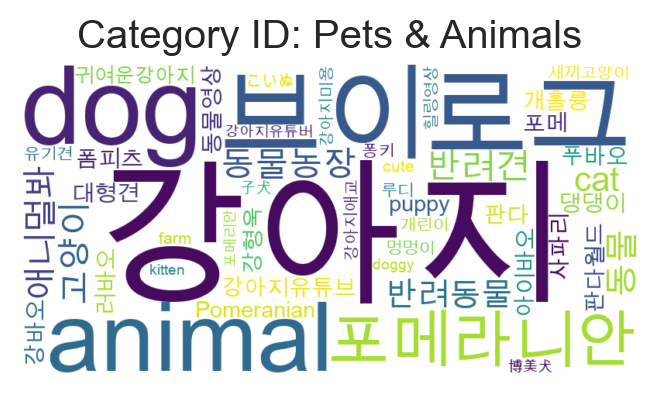

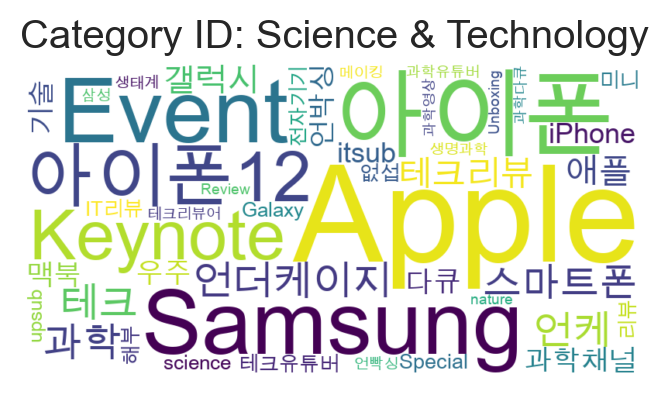

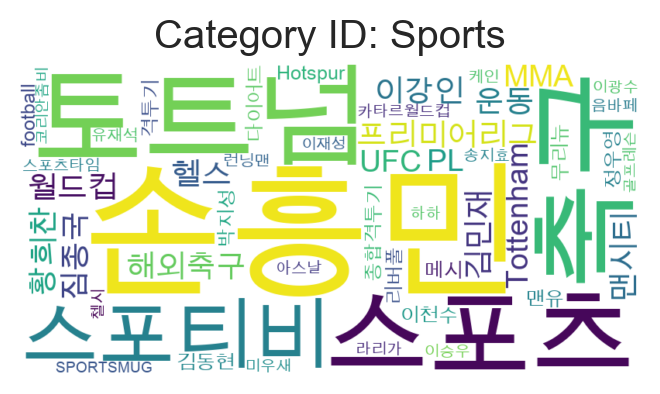

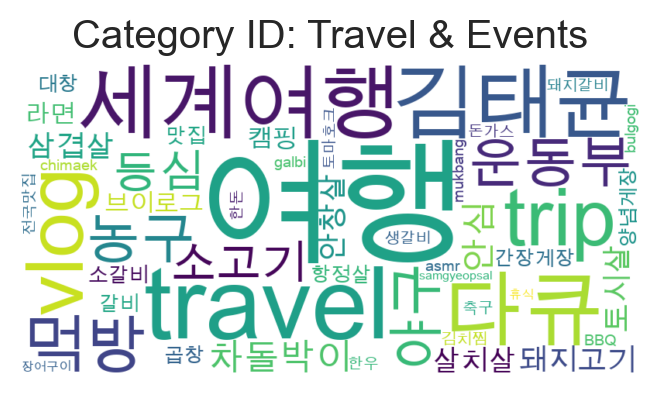

In [49]:
# 각 카테고리별로 워드 클라우드 생성
for category_id, top_tags in top_tags_by_category.items():
    tags_text = " ".join([tag for tag in top_tags])
    wc = WordCloud(width=800, height=400, background_color='white',  font_path='/Library/Fonts/AppFonts/Arial Unicode.ttf')
    wc.generate(tags_text)
    plt.figure(figsize=(4, 4))
    plt.imshow(wc, interpolation="bilinear")
    plt.title(f'Category ID: {category_id}')
    plt.axis('off')
    plt.show()